# Сборный проект — 2. HR-аналитика для компании «Работа с заботой».

**Описание проекта**

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли.

У нас будет несколько задач:

1. **Первая задача** — построить модель, которая сможет предсказать уровень удовлетворенности сотрудника на основе данных заказчика. Почему бизнесу это важно: удовлетворенность работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

2. **Вторая задача** — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Исследование будет осуществляться на основе данных, предоставленных компанией «Работа с заботой»

Тренировочные и тестовые наборы данных содержат характеристики сотрудников и информацию о удовлетворенности и увольнениях.

**План исследования**

**1. Обзор данных:**
- Загрузка и первичный анализ предоставленных файлов данных.
- Оценка качества данных и выявление потенциальных проблем.

**2. Предобработка данных:**
- Исправление обнаруженных ошибок и пропусков.
- Преобразование типов данных для последующего анализа.

**3. Исследовательский анализ данных (EDA):**
- Анализ распределений и взаимосвязей ключевых переменных.
- Выявление факторов, потенциально влияющих на удовлетворенность и увольнения.

**4. Подготовка данных для моделирования:**
- Кодирование категориальных признаков.
- Масштабирование числовых данных.

**5. Построение и оценка моделей машинного обучения:**
- Разработка и обучение модели для предсказания уровня удовлетворенности сотрудников.
- Создание и оценка модели для прогнозирования вероятности увольнения сотрудников.
- Подбор гиперпараметров и оценка качества моделей.

**6. Итоговые выводы и рекомендации:**
- Формулирование ключевых выводов исследования.
- Предложение стратегий для улучшения управления персоналом в компании.

**Описание данных**

**Задача 1: Предсказание уровня удовлетворённости сотрудника.**  
Для этой задачи заказчик предоставил данные с признаками:

- **id** — уникальный идентификатор сотрудника
- **dept** — отдел, в котором работает сотрудник
- **level** — уровень занимаемой должности
- **workload** — уровень загруженности сотрудника
- **employment_years** — длительность работы в компании (в годах)
- **last_year_promo** — показывает, было ли повышение за последний год
- **last_year_violations** — показывает, нарушал ли сотрудник трудовой договор за последний год
- **supervisor_evaluation** — оценка качества работы сотрудника, которую дал руководитель
- **salary** — ежемесячная зарплата сотрудника
- **job_satisfaction_rate** — уровень удовлетворённости сотрудника работой в компании, целевой признак

**Предоставлены данные в нескольких таблицах:**
- **Тренировочная выборка:** `train_job_satisfaction_rate.csv`
- **Входные признаки тестовой выборки:** `test_features.csv`
- **Целевой признак тестовой выборки:** `test_target_job_satisfaction_rate.csv`

**Задача 2: Предсказание увольнения сотрудника из компании.**  
Для этой задачи можно использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это **quit** — увольнение сотрудника из компании.

**Предоставлены данные в нескольких таблицах:**
- **Тренировочная выборка:** `train_quit.csv`
- **Входные признаки тестовой выборки:** `test_features.csv` (те же, что и в прошлой задаче)
- **Целевой признак тестовой выборки:** `test_target_quit.csv`


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
!pip install -U scikit-learn -q

In [3]:
!pip install phik -q 

In [4]:
!pip install shap -q

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns
import shap
import time
from phik import phik_matrix, report
from phik.report import plot_correlation_matrix
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    RobustScaler,
    StandardScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Задача 1.

## Шаг 1. Загрузка данных

In [6]:
try:
    job_satisfaction = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', decimal='.', sep=',')
    test_features = pd.read_csv('/datasets/test_features.csv', decimal='.', sep=',')
    test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', decimal='.', sep=',') 
except:
    job_satisfaction = pd.read_csv("C:\\Users\\bkale\\Downloads\\train_job_satisfaction_rate.csv", decimal='.', sep=',')
    test_features = pd.read_csv("C:\\Users\\bkale\\Downloads\\test_features.csv", decimal='.', sep=',')
    test_target = pd.read_csv("C:\\Users\\bkale\\Downloads\\test_target_job_satisfaction_rate.csv", decimal='.', sep=',')

In [7]:
def descr (df):
    display(df.head(5))
    display(df.info()) 
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    print(f'Количество пропусков: {df.isna().sum()}')

In [8]:
descr (job_satisfaction)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

Количество дубликатов: 0
Количество пропусков: id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


In [9]:
descr (test_features)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

Количество дубликатов: 0
Количество пропусков: id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


In [10]:
descr (test_target)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

Количество дубликатов: 0
Количество пропусков: id                       0
job_satisfaction_rate    0
dtype: int64


Серьезных замечаний не обнаружено. Названия колонок соответствуют стандартам. Явных дубликатов в наборах данных не наблюдается. В двух таблицах присутствуют пропуски, которые будут обработаны позднее.

## Шаг 2. Предобработка данных

Проверим категориальные признаки на предмет наличия скрытых дублирующихся значений и возможных ошибок.

In [11]:
def cat_info (df):
    display (df.head())
    print(df.columns)

In [12]:
cat_info (job_satisfaction)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')


In [13]:
job_satisfaction['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [14]:
job_satisfaction['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [15]:
job_satisfaction['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [16]:
job_satisfaction['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
job_satisfaction['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
cat_info (test_features)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')


In [19]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [20]:
test_features['dept'] = test_features['dept'].replace(' ', np.nan)

In [21]:
test_features['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [22]:
test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [23]:
test_features['workload'] = test_features['workload'].replace(' ', np.nan)

In [24]:
test_features['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
test_features['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

Просмотрели наши категориальнве данные на наличие неявных дубликатов или ошибок при заполнении - ничего подозрительного не обнаруженно.

В двух колонках заменили пустые значения на nan.

## Шаг 3. Исследовательский анализ данных

In [26]:
sns.set_style("darkgrid") 

def diagram(dataframe, category_column, chart_title, x_label, y_label):
    total_rows = len(dataframe)
    group_sizes = dataframe.groupby(category_column).size() / total_rows
    sorted_groups = group_sizes.sort_values()

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.barh(sorted_groups.index, sorted_groups.values, color='steelblue')

    ax.set_title(chart_title, fontsize=16, fontweight="bold", color='black')
    ax.set_xlabel(x_label, fontsize=14, fontweight="bold", color='black')
    ax.set_ylabel(y_label, fontsize=14, fontweight="bold", color='black')

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    percentages = dict(sorted_groups)
    for idx, value in enumerate(percentages.values()):
        ax.text(value - 0.05, idx, f"{value * 100:.2f}%",
                fontsize='large', fontweight='bold', color='white', va='center')

    plt.tight_layout()
    plt.show()

In [27]:
sns.set_style("darkgrid")

def bar_chart_target(df, target_col, feature_col, title, xlabel, ylabel, cat_A, cat_B):
    fig, ax = plt.subplots(figsize=(16, 8))

    df[feature_col][df[target_col] == cat_A].plot(kind='hist', bins=50, grid=False, color='red', alpha=0.5, label=f'{cat_A}', ax=ax)
    df[feature_col][df[target_col] == cat_B].plot(kind='hist', bins=50, grid=False, color='blue', alpha=0.5, label=f'{cat_B}', ax=ax)

    ax.legend(prop={'size': 14}, loc='upper right')
    ax.set_title(title, fontsize=16, fontweight="bold", color='black')
    ax.set_xlabel(xlabel, fontsize=14, fontweight="bold", color='black')
    ax.set_ylabel(ylabel, fontsize=14, fontweight="bold", color='black')

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

In [28]:
sns.set_style("darkgrid")

def bar_chart(df, column, title, xlabel, ylabel, bins):
    fig, ax = plt.subplots(figsize=(16, 8))

    df[column].plot(kind='hist', bins=bins, grid=False, color='steelblue', ax=ax)

    ax.set_title(title, fontsize=16, fontweight="bold", color='black')
    ax.set_xlabel(xlabel, fontsize=14, fontweight="bold", color='black')
    ax.set_ylabel(ylabel, fontsize=14, fontweight="bold", color='black')

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

file=job_satisfaction
column='dept'
title='Соотношение количества сотрудников по отделам'
xlabel='Доля сотрудников, %'
ylabel='Отделы'
diagram(file, column, title, xlabel, ylabel)

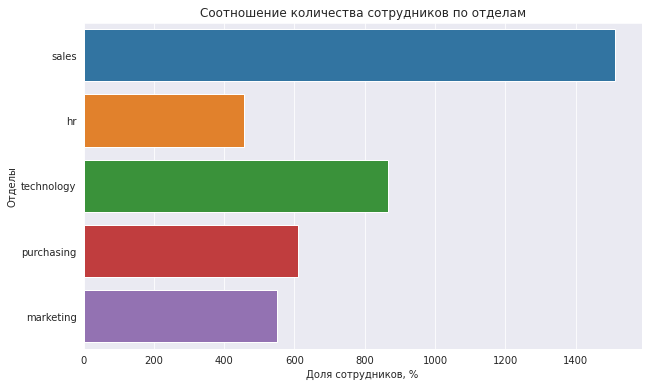

In [29]:
def diagram(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))  
    ax = sns.countplot(y=column, data=df)  
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    plt.show()

column = 'dept'
title = 'Соотношение количества сотрудников по отделам'
xlabel = 'Доля сотрудников, %'
ylabel = 'Отделы'
diagram(job_satisfaction, column, title, xlabel, ylabel)

file=job_satisfaction
column='last_year_promo'
title='Соотношение количества сотрудников по повышениям за последний год'
xlabel='Доля сотрудников, %'
ylabel='Было ли повышение по должности'
diagram(file, column, title, xlabel, ylabel)

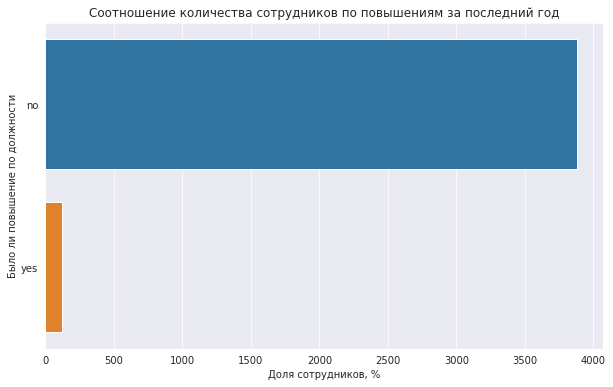

In [30]:
def diagram(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=column, data=df)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

column = 'last_year_promo'
title = 'Соотношение количества сотрудников по повышениям за последний год'
xlabel = 'Доля сотрудников, %'
ylabel = 'Было ли повышение по должности'
diagram(job_satisfaction, column, title, xlabel, ylabel)

file=job_satisfaction
column='last_year_violations'
title='Соотношение количества сотрудников нарушающих трудовой договор за последний год'
xlabel='Доля сотрудников, %'
ylabel='Было ли нарушение трудового договора'
diagram(file, column, title, xlabel, ylabel)

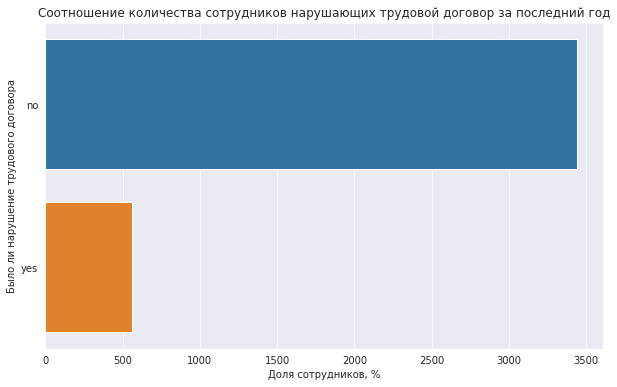

In [31]:
def diagram(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=column, data=df)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

column = 'last_year_violations'
title = 'Соотношение количества сотрудников нарушающих трудовой договор за последний год'
xlabel = 'Доля сотрудников, %'
ylabel = 'Было ли нарушение трудового договора'
diagram(job_satisfaction, column, title, xlabel, ylabel)

file=job_satisfaction
column='level'
title='Соотношение количества сотрудников по уровню занимаемой должности'
xlabel='Доля сотрудников, %'
ylabel='Уровень занимаемой должности'
diagram(file, column, title, xlabel, ylabel)

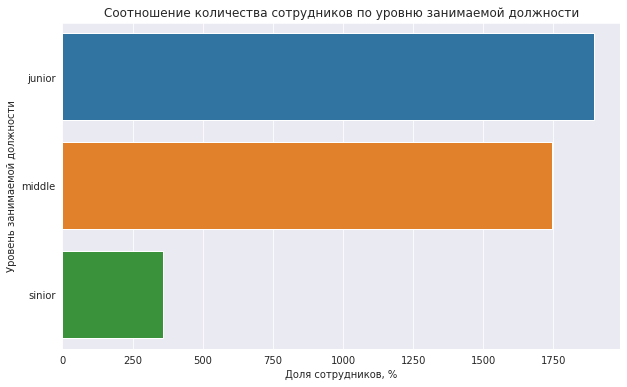

In [32]:
def diagram(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=column, data=df)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

column = 'level'
title = 'Соотношение количества сотрудников по уровню занимаемой должности'
xlabel = 'Доля сотрудников, %'
ylabel = 'Уровень занимаемой должности'
diagram(job_satisfaction, column, title, xlabel, ylabel)

file=job_satisfaction
column='workload'
title='Соотношение количества сотрудников по уровню загруженности'
xlabel='Доля сотрудников, %'
ylabel='Уровень загруженности'
diagram(file, column, title, xlabel, ylabel)

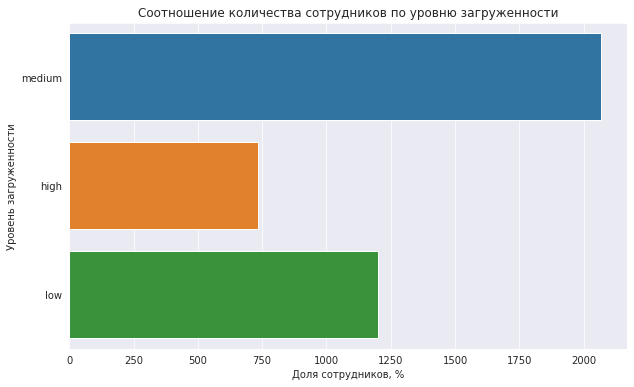

In [33]:
def diagram(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=column, data=df)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

column = 'workload'
title = 'Соотношение количества сотрудников по уровню загруженности'
xlabel = 'Доля сотрудников, %'
ylabel = 'Уровень загруженности'
diagram(job_satisfaction, column, title, xlabel, ylabel)

file=job_satisfaction
column='employment_years'
title='Распределение сотрудников по длительности работы в компании (в годах)'
xlabel='Годы'
ylabel='Количество сотрудников'
bins=10
bar_chart(file, column, title, xlabel, ylabel, bins)

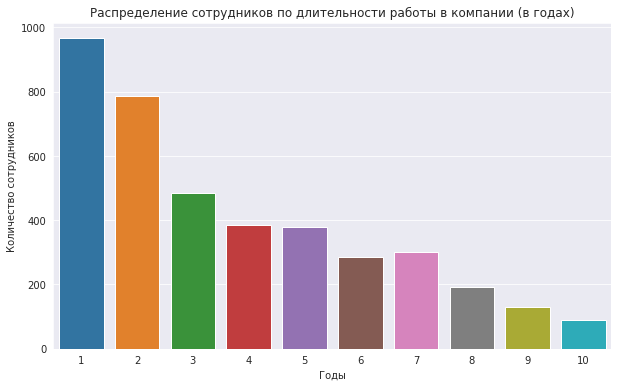

In [34]:
def bar_chart(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=df)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

column = 'employment_years'
title = 'Распределение сотрудников по длительности работы в компании (в годах)'
xlabel = 'Годы'
ylabel = 'Количество сотрудников'
bar_chart(job_satisfaction, column, title, xlabel, ylabel)

file=job_satisfaction
column='supervisor_evaluation'
title='Распределение сотрудников по оценкам качества работы, которую дал руководитель.'
xlabel='Оценка качества работы'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

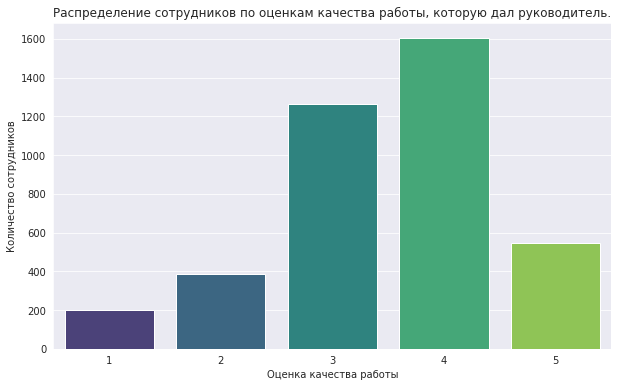

In [35]:
def bar_chart(file, column, title, xlabel, ylabel):
    df = pd.read_csv(file)
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column], palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

file = '/datasets/train_job_satisfaction_rate.csv'
column = 'supervisor_evaluation'
title = 'Распределение сотрудников по оценкам качества работы, которую дал руководитель.'
xlabel = 'Оценка качества работы'
ylabel = 'Количество сотрудников'

bar_chart(file, column, title, xlabel, ylabel)

file=job_satisfaction
column='salary'
title='Распределение сотрудников по уровню ежемесячной зарплаты сотрудника'
xlabel='Уровень заработной платы'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

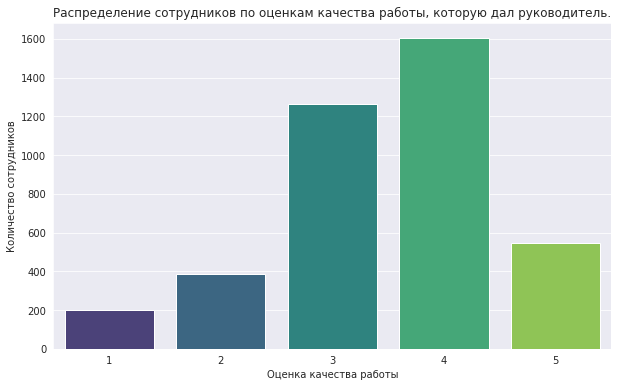

In [36]:
def bar_chart(file, column, title, xlabel, ylabel):
    df = pd.read_csv(file)
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column], palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

file = '/datasets/train_job_satisfaction_rate.csv'
column = 'supervisor_evaluation'
title = 'Распределение сотрудников по оценкам качества работы, которую дал руководитель.'
xlabel = 'Оценка качества работы'
ylabel = 'Количество сотрудников'

bar_chart(file, column, title, xlabel, ylabel)

file=job_satisfaction
column='job_satisfaction_rate'
title='Распределение сотрудников по уровеню удовлетворённости работой в компании'
xlabel='Уровень удовлетворённости работой в компании'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

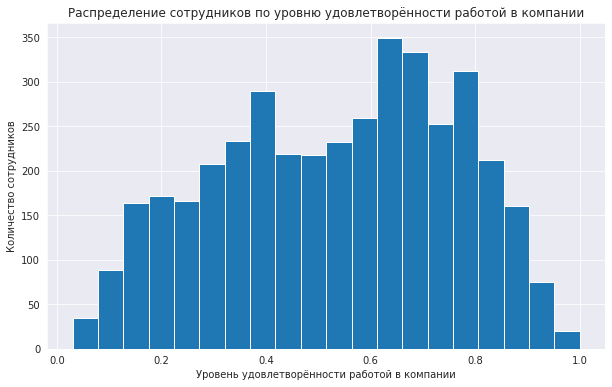

In [37]:
def bar_chart(file, column, title, xlabel, ylabel, bins):
    df = pd.read_csv(file)
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

file = '/datasets/train_job_satisfaction_rate.csv'
column = 'job_satisfaction_rate'
title = 'Распределение сотрудников по уровню удовлетворённости работой в компании'
xlabel = 'Уровень удовлетворённости работой в компании'
ylabel = 'Количество сотрудников'
bins = 20
bar_chart(file, column, title, xlabel, ylabel, bins)

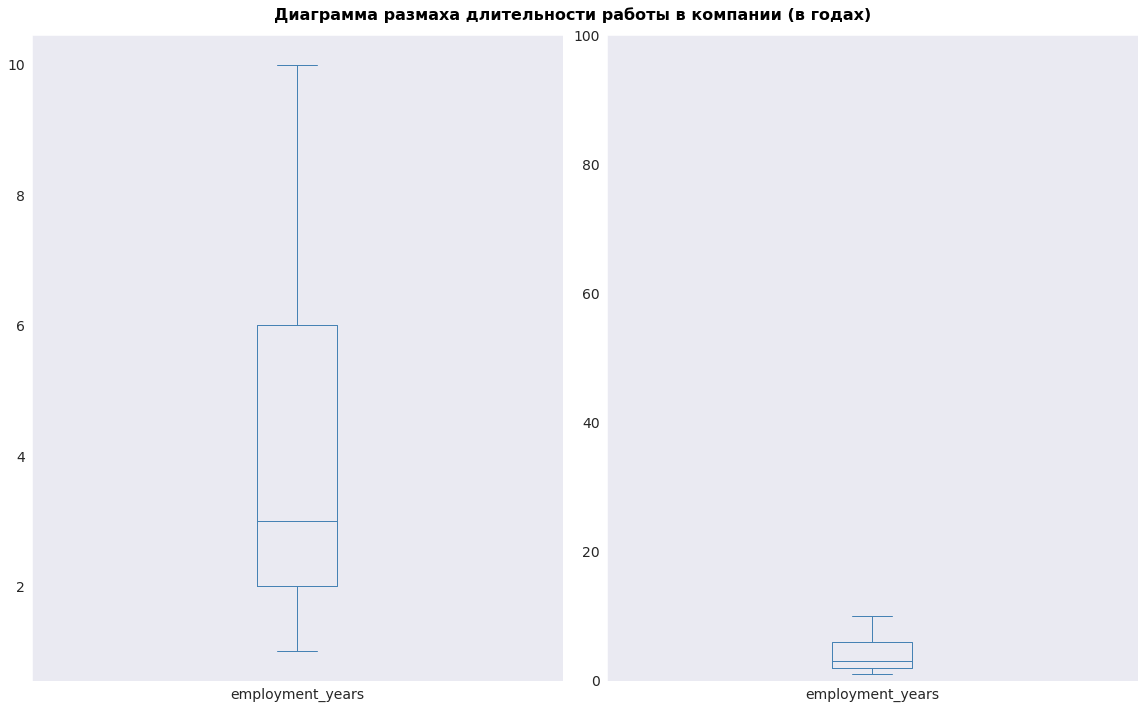

In [38]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

job_satisfaction['employment_years'].plot.box(grid=False, fontsize=14, color='steelblue', ax=axes[0])
job_satisfaction['employment_years'].plot.box(grid=False, fontsize=14, color='steelblue', ax=axes[1])

axes[1].set_ylim(0, 100)

plt.suptitle('Диаграмма размаха длительности работы в компании (в годах)', fontsize=16, fontweight="bold", color='black')
plt.tight_layout()
plt.show()

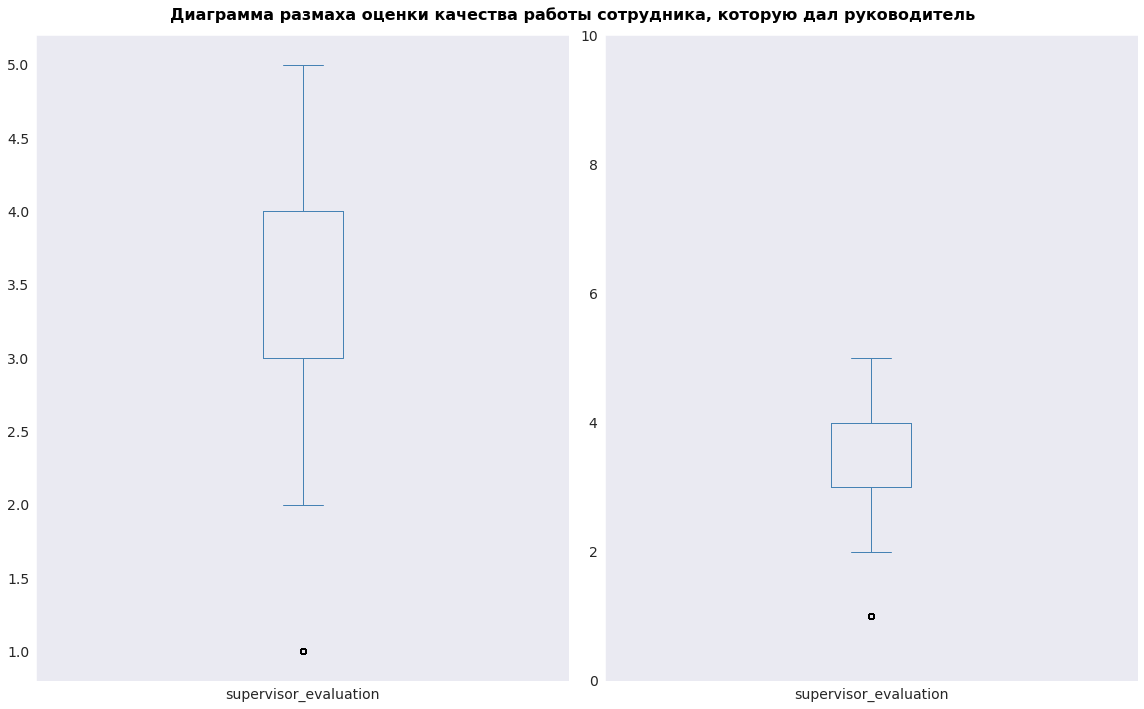

In [39]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

job_satisfaction['supervisor_evaluation'].plot.box(grid=False, fontsize=14, color='steelblue', ax=axes[0])
job_satisfaction['supervisor_evaluation'].plot.box(grid=False, fontsize=14, color='steelblue', ax=axes[1])

axes[1].set_ylim(0, 10)

plt.suptitle('Диаграмма размаха оценки качества работы сотрудника, которую дал руководитель', fontsize=16, fontweight="bold", color='black')
plt.tight_layout()
plt.show()

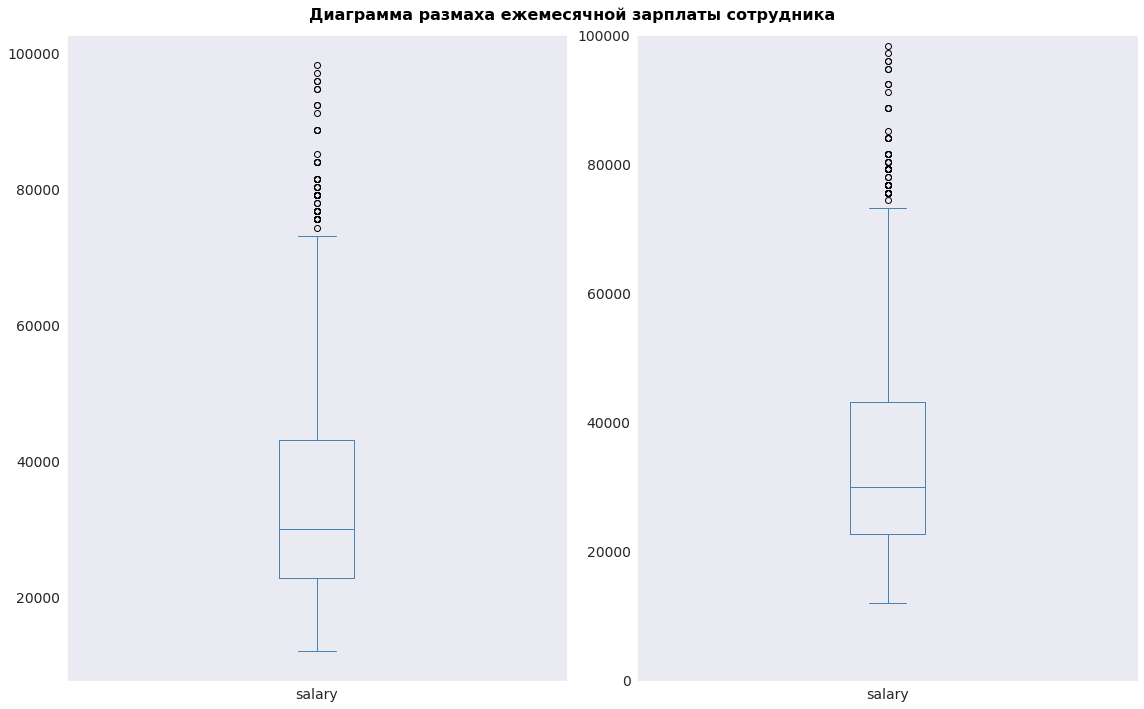

In [40]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

job_satisfaction['salary'].plot.box(grid=False, fontsize=14, color='steelblue', ax=axes[0])
job_satisfaction['salary'].plot.box(grid=False, fontsize=14, color='steelblue', ax=axes[1])

axes[1].set_ylim(0, 100000)

plt.suptitle('Диаграмма размаха ежемесячной зарплаты сотрудника', fontsize=16, fontweight="bold", color='black')
plt.tight_layout()
plt.show()

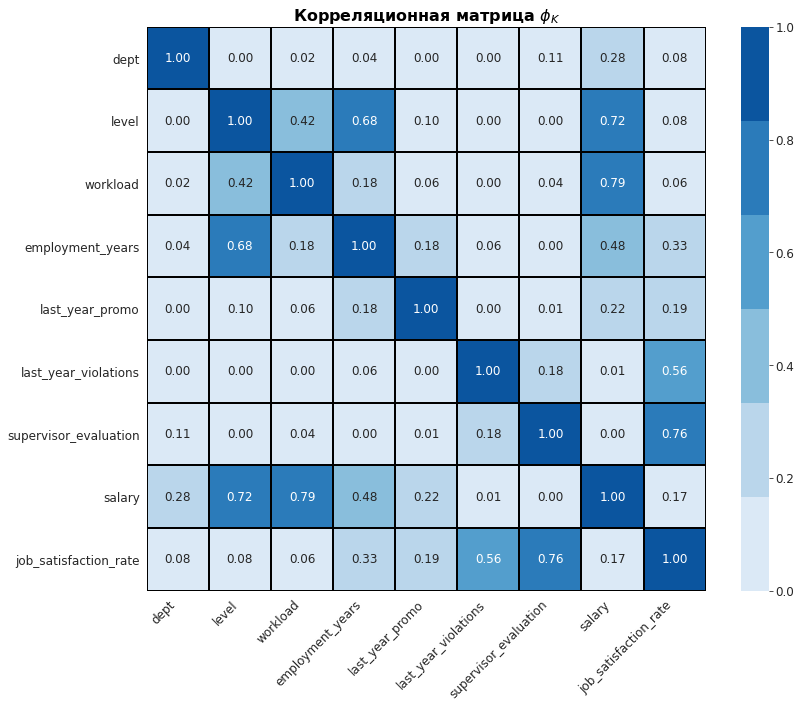

In [41]:
sns.set_style("darkgrid")

columns_to_drop = ['id']
file = job_satisfaction.drop(columns=columns_to_drop, errors='ignore')
all_features = list(file.columns)
correlation = file[all_features].phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])

plt.figure(figsize=(12, 10))
colormap = sns.color_palette("Blues")
plt.rc('font', size=12)

chart = sns.heatmap(correlation, annot=True, fmt=".2f", cmap=colormap, linewidths=1, linecolor='black')

plt.title('Корреляционная матрица $\phi_K$', fontsize=16, fontweight="bold", color='black')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

plt.tight_layout()
plt.show()

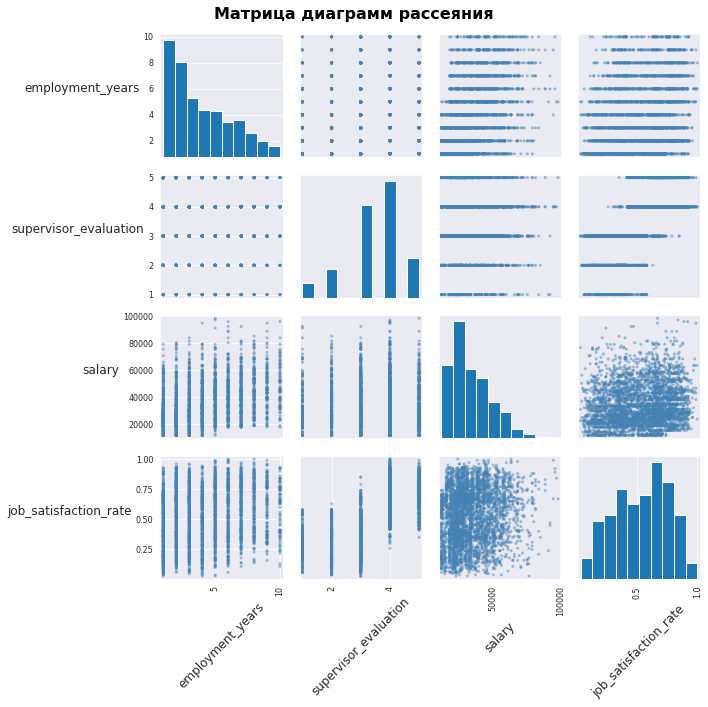

In [42]:
sns.set_style("darkgrid")

file = job_satisfaction

axes = pd.plotting.scatter_matrix(file[file.columns[file.columns != 'id']], figsize=(10, 10), color='steelblue')

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.suptitle('Матрица диаграмм рассеяния', fontsize=16, fontweight="bold", color='black')
plt.tight_layout()
plt.show()

file=test_features
column='dept'
title='Соотношение количества сотрудников по отделам'
xlabel='Доля сотрудников, %'
ylabel='Отделы'
diagram(file, column, title, xlabel, ylabel)

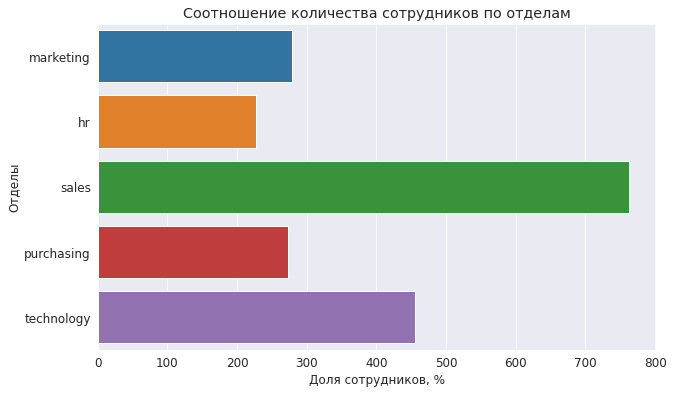

In [43]:
def diagram(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=column, data=df)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

column = 'dept'
title = 'Соотношение количества сотрудников по отделам'
xlabel = 'Доля сотрудников, %'
ylabel = 'Отделы'
diagram(test_features, column, title, xlabel, ylabel)

file=test_features
column='last_year_promo'
title='Соотношение количества сотрудников по повышению за последний год'
xlabel='Доля сотрудников, %'
ylabel='Было ли повышение по должности'
diagram(file, column, title, xlabel, ylabel)

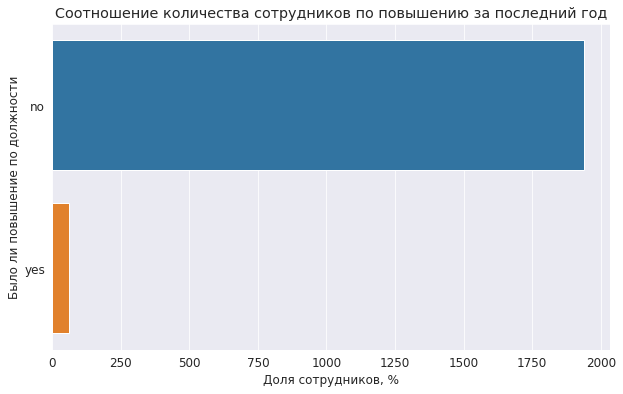

In [44]:
def diagram(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=column, data=df)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

column = 'last_year_promo'
title = 'Соотношение количества сотрудников по повышению за последний год'
xlabel = 'Доля сотрудников, %'
ylabel = 'Было ли повышение по должности'
diagram(test_features, column, title, xlabel, ylabel)

file=test_features
column='last_year_violations'
title='Соотношение количества сотрудников нарушающих трудовой договор за последний год'
xlabel='Доля сотрудников, %'
ylabel='Было ли нарушение трудового договора'
diagram(file, column, title, xlabel, ylabel)

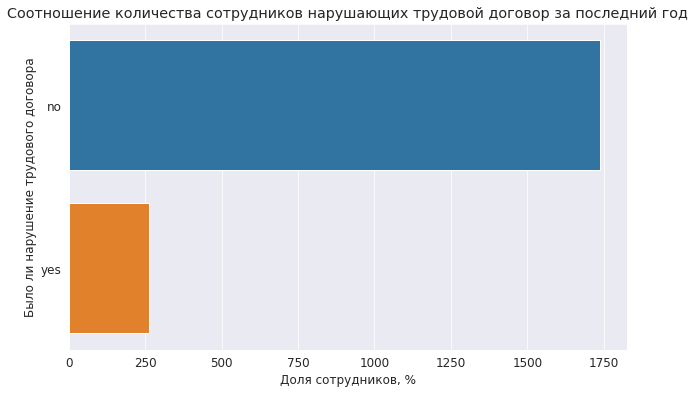

In [45]:
def diagram(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=column, data=df)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

column = 'last_year_violations'
title = 'Соотношение количества сотрудников нарушающих трудовой договор за последний год'
xlabel = 'Доля сотрудников, %'
ylabel = 'Было ли нарушение трудового договора'
diagram(test_features, column, title, xlabel, ylabel)

file=test_features
column='level'
title='Соотношение количества сотрудников по уровню занимаемой должности'
xlabel='Доля сотрудников, %'
ylabel='Уровень занимаемой должности'
diagram(file, column, title, xlabel, ylabel)

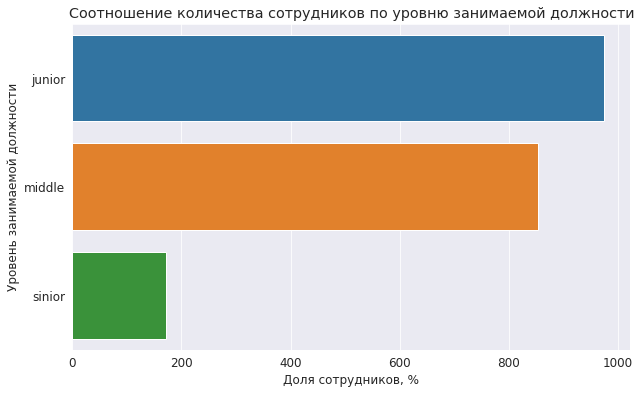

In [46]:
def diagram(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=column, data=df)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

column = 'level'
title = 'Соотношение количества сотрудников по уровню занимаемой должности'
xlabel = 'Доля сотрудников, %'
ylabel = 'Уровень занимаемой должности'
diagram(test_features, column, title, xlabel, ylabel)

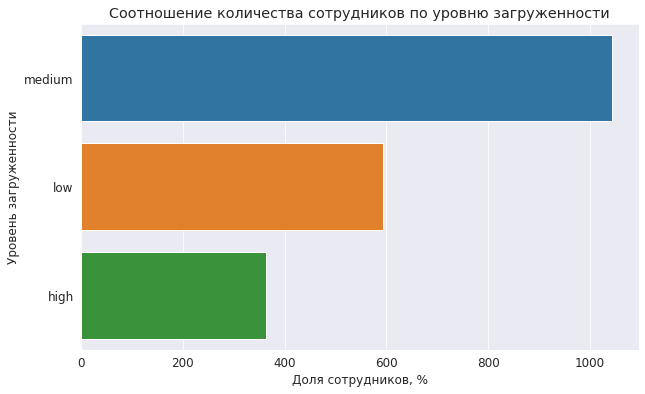

In [47]:
file=test_features
column='workload'
title='Соотношение количества сотрудников по уровню загруженности'
xlabel='Доля сотрудников, %'
ylabel='Уровень загруженности'
diagram(file, column, title, xlabel, ylabel)

file=test_features
column='employment_years'
title='Распределение сотрудников по длительности работы в компании (в годах)'
xlabel='Годы'
ylabel='Количество сотрудников'
bins=10
bar_chart(file, column, title, xlabel, ylabel, bins)

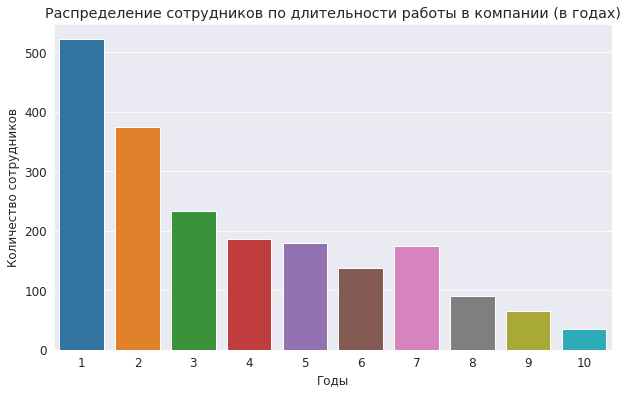

In [48]:
def bar_chart(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

column = 'employment_years'
title = 'Распределение сотрудников по длительности работы в компании (в годах)'
xlabel = 'Годы'
ylabel = 'Количество сотрудников'

bar_chart(test_features, column, title, xlabel, ylabel)

file=test_features
column='supervisor_evaluation'
title='Распределение сотрудников по оценкам качества работы, которую дал руководитель'
xlabel='Оценка качества работы'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

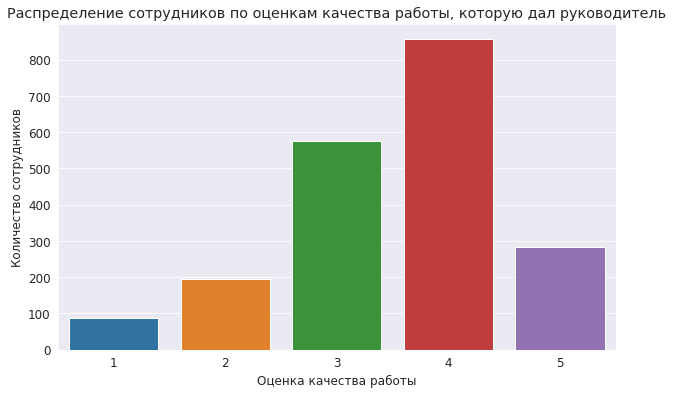

In [49]:
def bar_chart(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

column = 'supervisor_evaluation'
title = 'Распределение сотрудников по оценкам качества работы, которую дал руководитель'
xlabel = 'Оценка качества работы'
ylabel = 'Количество сотрудников'

bar_chart(test_features, column, title, xlabel, ylabel)

file=test_features
column='salary'
title='Распределение сотрудников по уровню ежемесячной зарплаты сотрудника'
xlabel='Уровень заработной платы'
ylabel='Количество сотрудников'
bins=20
bar_chart(file, column, title, xlabel, ylabel, bins)

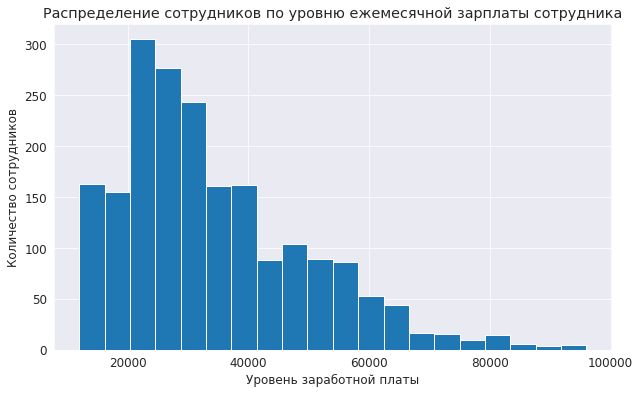

In [50]:
def bar_chart(df, column, title, xlabel, ylabel, bins):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

column = 'salary'
title = 'Распределение сотрудников по уровню ежемесячной зарплаты сотрудника'
xlabel = 'Уровень заработной платы'
ylabel = 'Количество сотрудников'
bins = 20
bar_chart(test_features, column, title, xlabel, ylabel, bins)

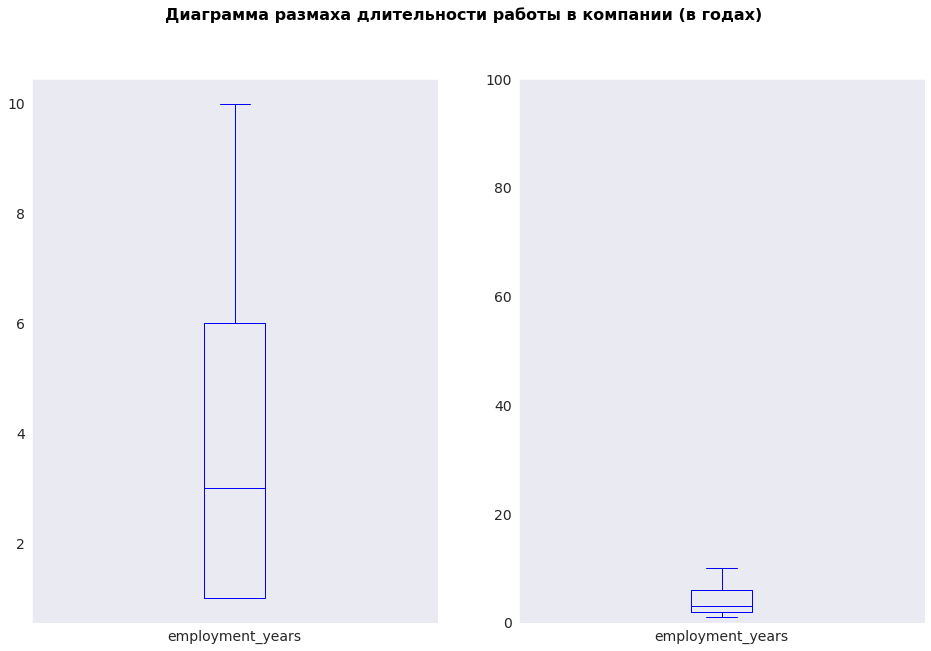

In [51]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
test_features.boxplot(column=['employment_years'], grid=False, fontsize=14, color='blue', ax=axes[0])
job_satisfaction.boxplot(column=['employment_years'], grid=False, fontsize=14, color='blue', ax=axes[1])
axes[1].set_ylim(0, 100)
plt.suptitle('Диаграмма размаха длительности работы в компании (в годах)', fontsize=16, fontweight="bold", color='black')
plt.show()

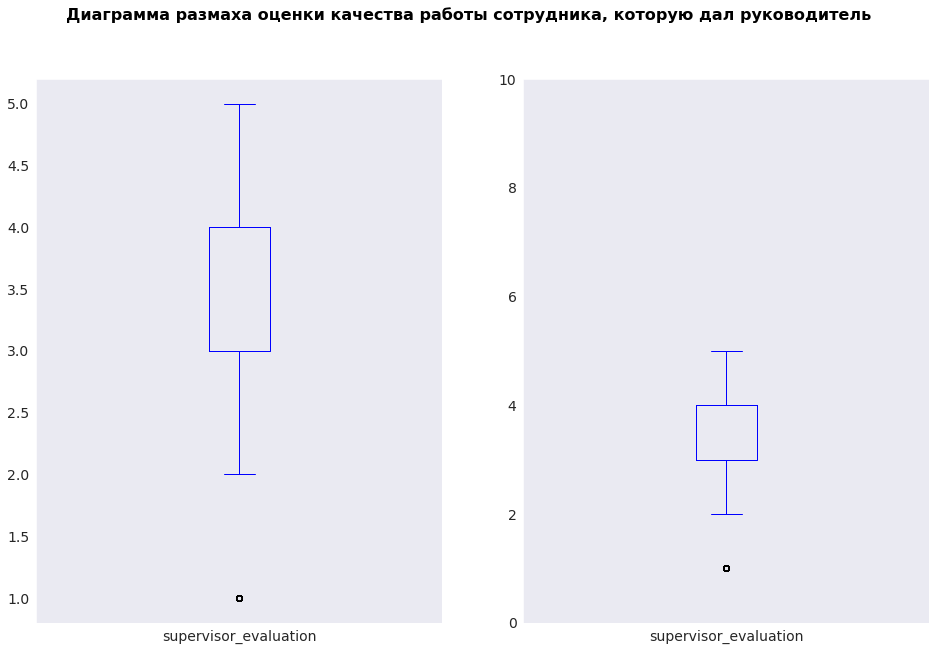

In [52]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
test_features.boxplot(column=['supervisor_evaluation'], grid=False, fontsize=14, color='blue', ax=axes[0])
job_satisfaction.boxplot(column=['supervisor_evaluation'], grid=False, fontsize=14, color='blue', ax=axes[1])
axes[1].set_ylim(0, 10)
plt.suptitle('Диаграмма размаха оценки качества работы сотрудника, которую дал руководитель', fontsize=16, fontweight="bold", color='black')
plt.show()

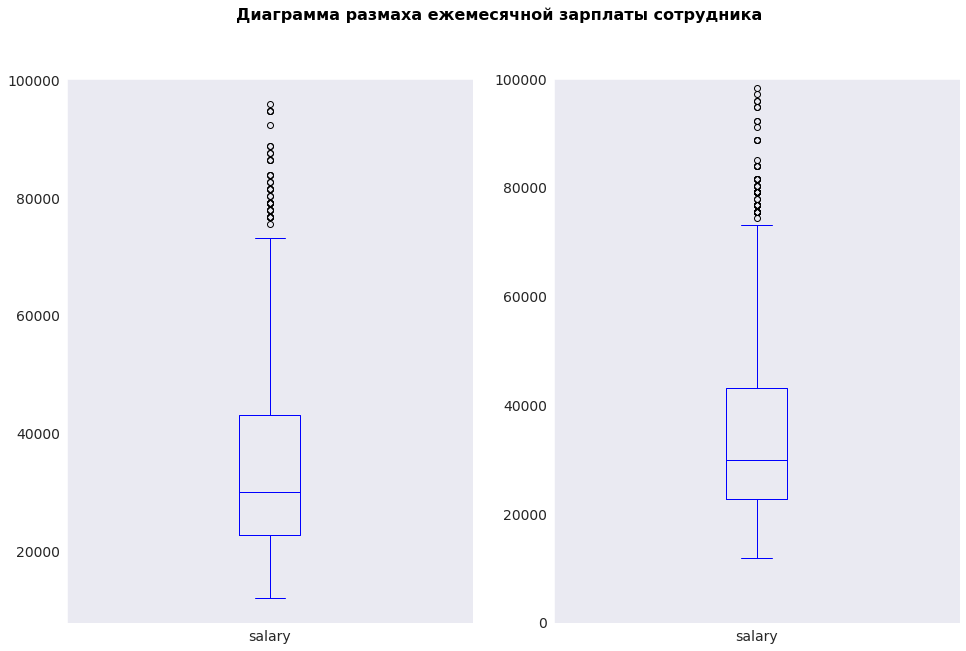

In [53]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
test_features.boxplot(column=['salary'], grid=False, fontsize=14, color='blue', ax=axes[0])
job_satisfaction.boxplot(column=['salary'], grid=False, fontsize=14, color='blue', ax=axes[1])
axes[1].set_ylim(0, 100000)
plt.suptitle('Диаграмма размаха ежемесячной зарплаты сотрудника', fontsize=16, fontweight="bold", color='black')
plt.show()

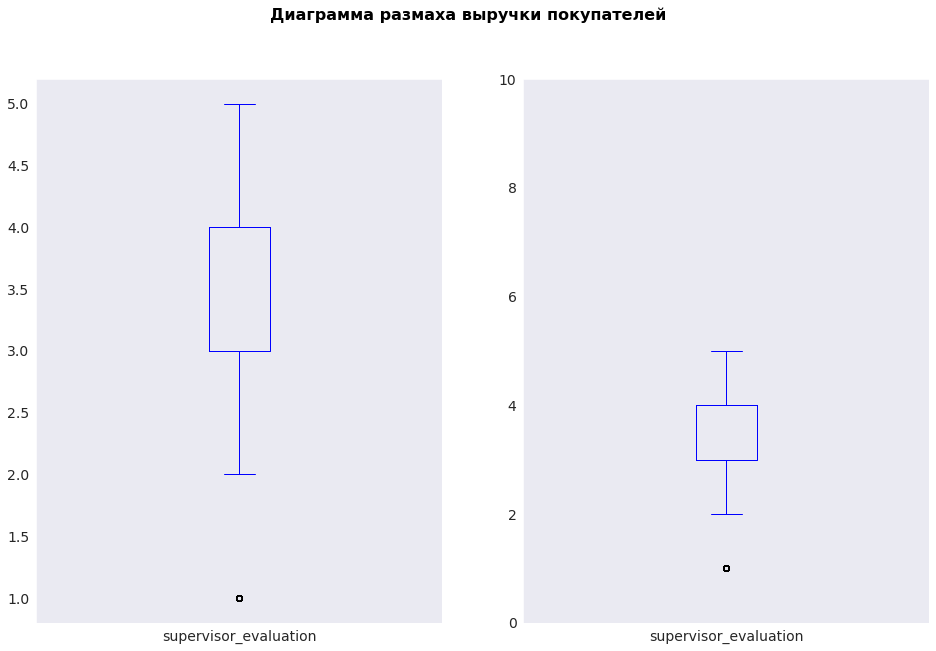

In [54]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
test_features.boxplot(column=['supervisor_evaluation'], grid= False, fontsize=14, color='blue', ax=axes[0])
job_satisfaction.boxplot(column=['supervisor_evaluation'], grid= False, fontsize=14, color='blue', ax=axes[1])
axes[1].set_ylim(0, 10)
plt.suptitle(f'Диаграмма размаха выручки покупателей', fontsize=16, fontweight="bold", color='black')
plt.show()

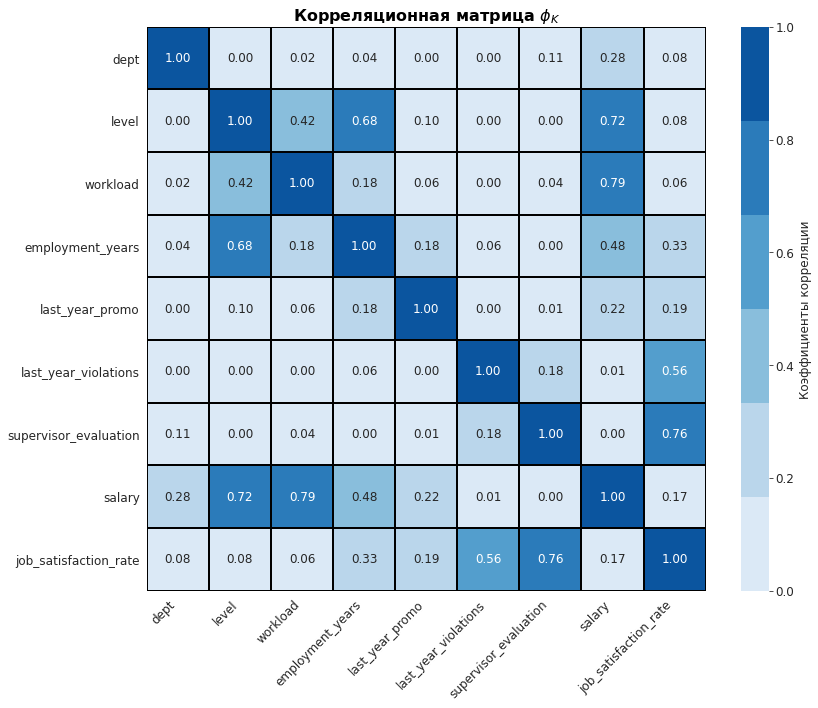

In [55]:
sns.set_style("darkgrid")

columns_to_drop = ['id']
file = job_satisfaction.drop(columns=columns_to_drop, errors='ignore')
all_features = list(file.columns)

correlation = file[all_features].phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])

plt.figure(figsize=(12, 10))
colormap = sns.color_palette("Blues")
plt.rc('font', size=12)

chart = sns.heatmap(
    correlation,
    annot=True,          
    fmt=".2f",           
    cmap=colormap,       
    linewidths=1,        
    linecolor='black',   
    cbar_kws={'label': 'Коэффициенты корреляции'}  
)

plt.title('Корреляционная матрица $\phi_K$', fontsize=16, fontweight="bold", color='black')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

plt.tight_layout()
plt.show()

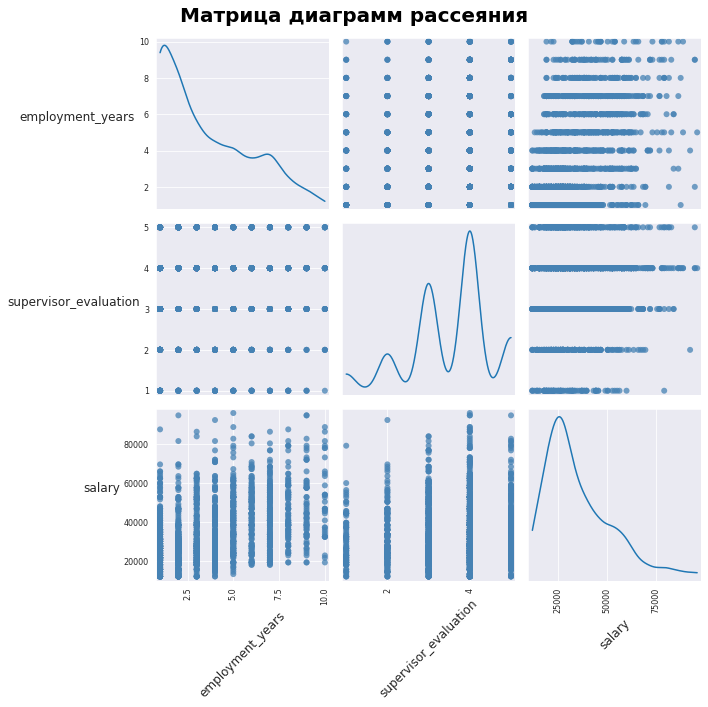

In [56]:
sns.set_style("darkgrid")

file = test_features

axes = pd.plotting.scatter_matrix(
    file[file.columns[file.columns != 'id']],
    figsize=(10, 10),
    marker='o',
    facecolors='steelblue',  
    alpha=0.75,      
    diagonal='kde'   
)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.suptitle('Матрица диаграмм рассеяния', fontsize=20, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [57]:
# Создадим список с числовыми переменными.
num_col=['salary', 'job_satisfaction_rate']
# Создадим список с названиями графиков.
titles_num = ['Ежемесячная зарплата сотрудника', 'Уровень удовлетворённости сотрудника работой']

Исследование выявило небольшое количество выбросов, однако их уровень считается приемлемым, поэтому удаление не требуется. Другие замечания отсутствуют.

## Шаг 4. Подготовка данных

**Подготовку проведём в пайплайне.**  
**Подготовка данных:**  
- `dept`, `last_year_promo`, `last_year_violations`: будем кодировать с помощью `OneHotEncoder`.
- `level`, `workload`: с помощью `OrdinalEncoder`.
- `employment_years`, `supervisor_evaluation`, `salary`: нужно масштабировать.

## Шаг 5. Обучение моделей

Наши данные изначально были разделены на тренировочную, тестовую и целевую тестовую выборки.

In [58]:
train_1 = job_satisfaction.drop(['id'], axis=1)
train_1.drop_duplicates(inplace=True)

In [59]:
RANDOM_STATE = 100
TEST_SIZE = 0.25
X_train = train_1.drop('job_satisfaction_rate', axis=1)
y_train = train_1['job_satisfaction_rate'] 


ohe_columns = ['dept', 'last_year_promo', 'last_year_violations'] 
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']


ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['low', 'medium', 'high'] 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),

    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])
 
param_grid = [

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 21),
        'models__min_samples_split': range(2, 21),
        'models__max_features': range(2, 21),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
    
]


def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))



smape_scorer = make_scorer(score_func=smape, greater_is_better=False)
 
r_search = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    n_iter=10,
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

r_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', r_search.best_estimator_)
print(f'Параметры лучшей модели:\n{r_search.best_params_}')
print ('Метрика лучшей модели на тренировочной выборке:', round(r_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [60]:
test_features = test_features.merge(test_target, on='id', how='left')
X_test = test_features.drop(['id', 'job_satisfaction_rate'], axis=1)
y_test = test_features['job_satisfaction_rate']
best_model = r_search.best_estimator_
print(f'Метрика SMAPE лучшей модели по кросс-валидации на обучающих данных: {round(r_search.best_score_*(-1),4)}')

Метрика SMAPE лучшей модели по кросс-валидации на обучающих данных: 15.1814


In [61]:
print(f'Метрика sMAPE лучшей модели на тестовой выборке: {round(smape(y_test, best_model.predict(X_test)),4)}')

Метрика sMAPE лучшей модели на тестовой выборке: 13.6159


**Результаты обучения модели**

Мы провели обучение модели, используя пайплайн с моделями `DecisionTreeClassifier()` и `LinearRegression()`.

**Параметры лучшей модели**

```json
{
    "preprocessor__num": "StandardScaler()", 
    "models__min_samples_split": 12, 
    "models__max_features": 10, 
    "models__max_depth": 17, 
    "models": "DecisionTreeRegressor(random_state=100)"
}
```

**Оценки модели**

- Метрика лучшей модели на тренировочном наборе: -15.18.
- Метрика SMAPE лучшей модели при кросс-валидации на обучающем наборе: 15.1814.
- Метрика SMAPE лучшей модели на тестовом наборе: 13.6159.

# Задача 2.

## Шаг 1. Загрузка данных. Задача 2

In [62]:
try:
    train_quit = pd.read_csv('/datasets/train_quit.csv')
    test_features = pd.read_csv('/datasets/test_features.csv')
    test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')
except:
    train_quit = pd.read_csv("C:\\Users\\bkale\\Downloads\\train_quit.csv", decimal='.', sep=',')
    test_features = pd.read_csv("C:\\Users\\bkale\\Downloads\\test_features.csv", decimal='.', sep=',')
    test_target_quit = pd.read_csv("C:\\Users\\bkale\\Downloads\\test_target_quit.csv", decimal='.', sep=',')

In [63]:
descr(train_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

Количество дубликатов: 0
Количество пропусков: id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64


In [64]:
descr(test_features)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

Количество дубликатов: 0
Количество пропусков: id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


In [65]:
descr(test_target_quit)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

Количество дубликатов: 0
Количество пропусков: id      0
quit    0
dtype: int64


При анализе загруженных данных серьезных замечаний не обнаружено. Названия столбцов соответствуют принятым стандартам. Явных дубликатов в наборах данных не выявлено. В двух таблицах присутствуют пропуски, которые будут обработаны позже.

## Шаг 2. Предобработка данных. Задача 2

In [66]:
duplicate_id = train_quit[train_quit.duplicated(['id'])]

print(duplicate_id)

Empty DataFrame
Columns: [id, dept, level, workload, employment_years, last_year_promo, last_year_violations, supervisor_evaluation, salary, quit]
Index: []


In [67]:
for col in train_quit.iloc[:, 1:8]:
    print(train_quit[col].unique ())

['sales' 'purchasing' 'marketing' 'technology' 'hr']
['middle' 'junior' 'sinior']
['high' 'medium' 'low']
[ 2  5  1  8  4  7  3  9  6 10]
['no' 'yes']
['no' 'yes']
[4 1 3 5 2]


In [68]:
duplicate_id = test_features[test_features.duplicated(['id'])]

print(duplicate_id)

Empty DataFrame
Columns: [id, dept, level, workload, employment_years, last_year_promo, last_year_violations, supervisor_evaluation, salary]
Index: []


In [69]:
for col in test_features.iloc[:, 1:8]:
 print(test_features[col].unique ())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']
[ 2  1  5  6  3  9  7  4  8 10]
['no' 'yes']
['no' 'yes']
[5 4 3 1 2]


In [70]:
test_features['dept'] = test_features['dept'].replace(' ', np.nan)
test_features['workload'] = test_features['workload'].replace(' ', np.nan)
for col in test_features.iloc[:, 1:8]:
 print(test_features[col].unique ())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' nan]
[ 2  1  5  6  3  9  7  4  8 10]
['no' 'yes']
['no' 'yes']
[5 4 3 1 2]


In [71]:
duplicate_id = test_target_quit[test_target_quit.duplicated(['id'])]

print(duplicate_id)

Empty DataFrame
Columns: [id, quit]
Index: []


Проверили категориальные данные на предмет скрытых дубликатов или ошибок ввода — ничего подозрительного не найдено. Пустые значения заменены на nan.

## Шаг3. Исследовательский анализ данных. Задача 2

In [72]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [73]:
# Создадим список с числовыми переменными.
num_col_2=['salary']
# Создадим список с названиями графиков.
titles_num_2 = ['Ежемесячная зарплата сотрудника']

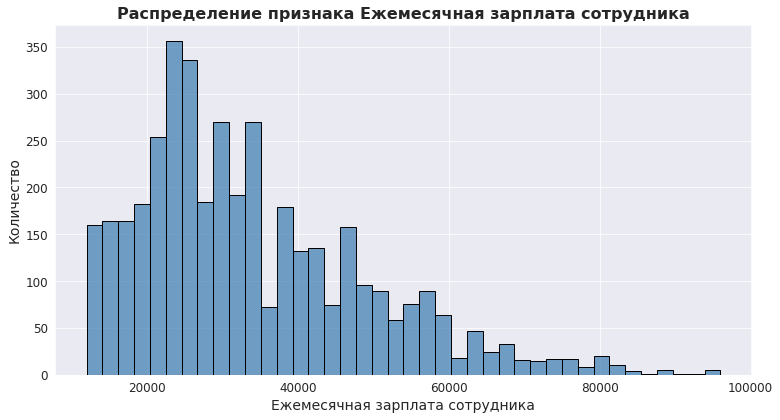

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


In [74]:
sns.set_style("darkgrid")

for i in range(len(num_col_2)):
    
    plt.figure(figsize=(11, 6))
    
    sns.histplot(data=train_quit, x=num_col_2[i], kde=False, color="steelblue", edgecolor='black', bins=40)
    
    plt.title(f"Распределение признака {titles_num[i]}", fontsize=16, fontweight="bold")
    plt.ylabel("Количество", fontsize=14)
    plt.xlabel(titles_num[i], fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    print(train_quit[num_col_2[i]].describe())

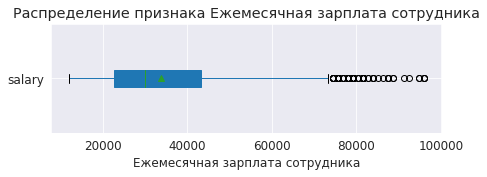

In [75]:
sns.set_style("darkgrid")

for i in range(len(num_col_2)):
    plt.figure(figsize=(7, 2))
    train_quit.boxplot(num_col_2[i], patch_artist=True, vert=False, showmeans=True )
    plt.title(f"Распределение признака {titles_num_2[i]}")
    plt.xlabel(titles_num_2[i])
    plt.show();

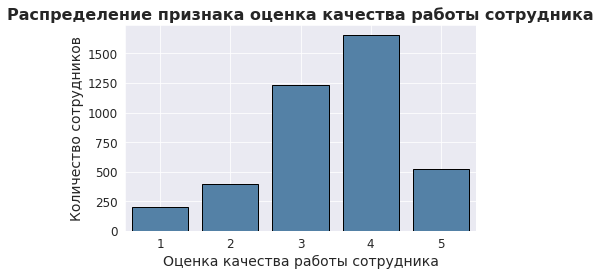

count    4000.000000
mean        3.474750
std         1.004049
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


In [76]:
sns.set_style("darkgrid")

ax = sns.countplot(x='supervisor_evaluation', data=train_quit, color="steelblue", edgecolor='black')

plt.title(f'Распределение признака оценка качества работы сотрудника', fontsize=16, fontweight="bold")
plt.xlabel('Оценка качества работы сотрудника', fontsize=14)
plt.ylabel('Количество сотрудников', fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

print(train_quit['supervisor_evaluation'].describe())

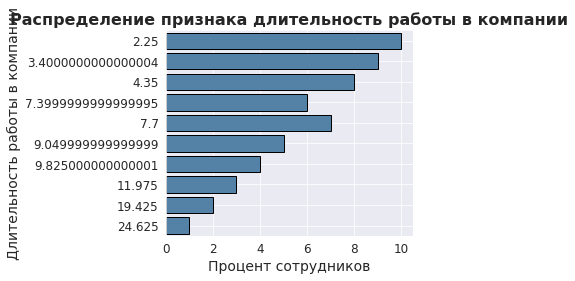

count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


In [77]:
sns.set_style("darkgrid")

values = train_quit['employment_years'].value_counts(normalize=True)

ax = sns.barplot(x=values.index, y=values.values * 100, orient='h', color="steelblue", edgecolor='black')

plt.title(f'Распределение признака длительность работы в компании', fontsize=16, fontweight="bold")
plt.xlabel('Процент сотрудников', fontsize=14)
plt.ylabel('Длительность работы в компании', fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

print(train_quit['employment_years'].describe())

In [78]:
cat_col_2=['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']

titles_cat_col_2= ['Отдел, в котором работает сотрудник', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 'Было ли повышение за последний год', 'Нарушал ли сотрудник трудовой договор за последний год', ' Увольнение сотрудника из компании']

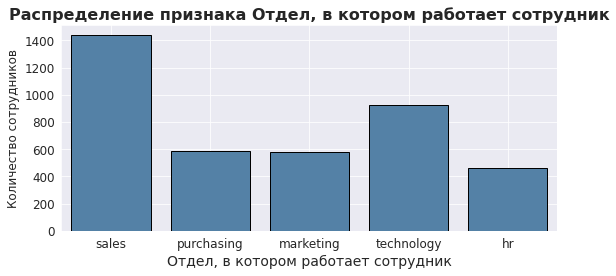

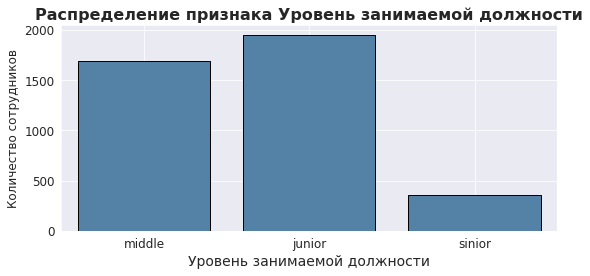

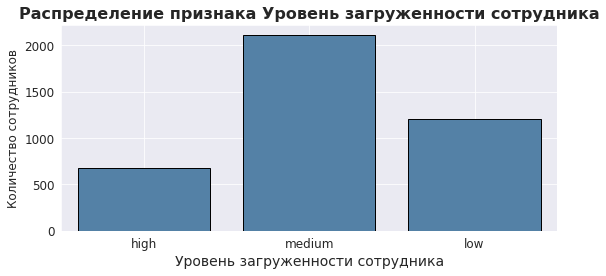

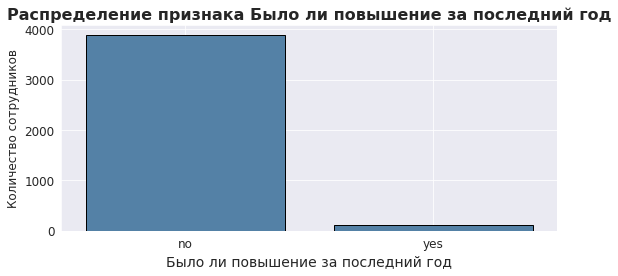

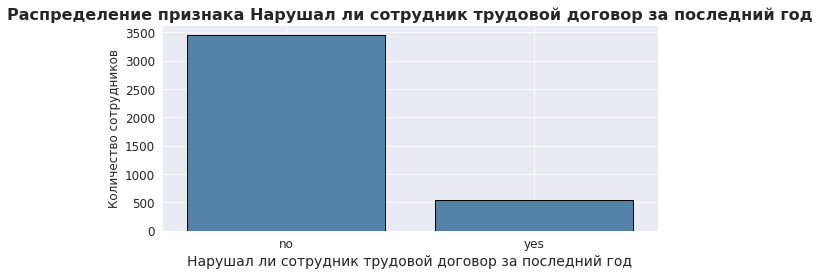

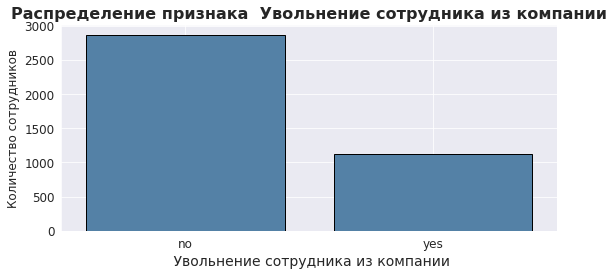

In [79]:
sns.set_style("darkgrid")

for i in range(len(cat_col_2)):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=cat_col_2[i], data=train_quit, color="steelblue", edgecolor='black')
    plt.title(f"Распределение признака {titles_cat_col_2[i]}", fontsize=16, fontweight="bold")
    plt.xlabel(titles_cat_col_2[i], fontsize=14)
    plt.ylabel('Количество сотрудников', size=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

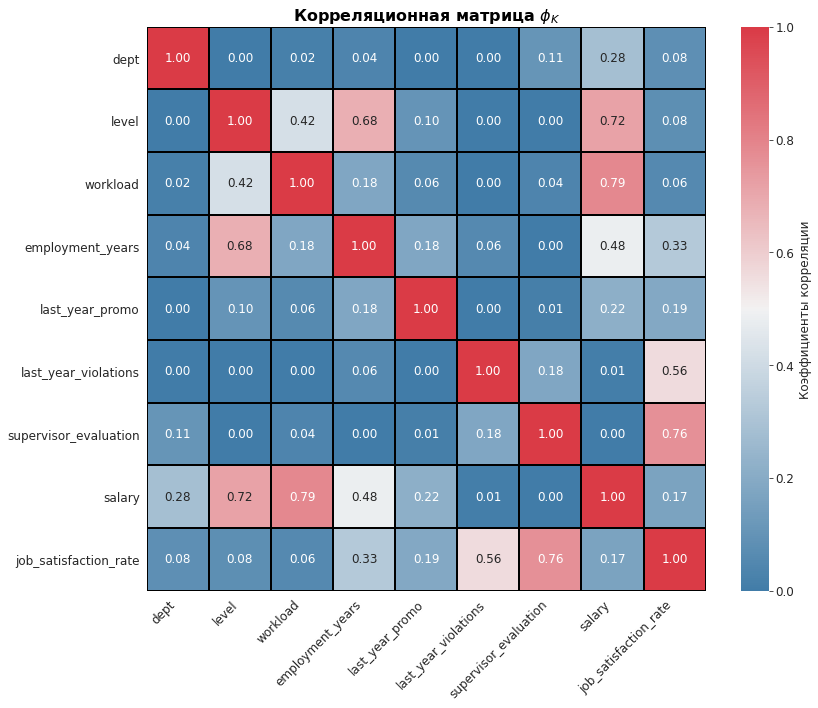

In [80]:
sns.set_style("darkgrid")

columns_to_drop = ['id']
file = job_satisfaction.drop(columns=columns_to_drop, errors='ignore')
all_features = list(file.columns)

correlation = file[all_features].phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])

plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

chart = sns.heatmap(
    correlation,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=1,
    linecolor='black',
    cbar_kws={'label': 'Коэффициенты корреляции'}
)

plt.title('Корреляционная матрица $\phi_K$', fontsize=16, fontweight="bold", color='black')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

plt.tight_layout()
plt.show()

После анализа данных в наборе train_quit мы не обнаружили значительных отличий от данных набора job_satisfaction. Однако стоит отметить, что признак quit имеет высокую значимость и коррелирует с уровнем заработной платы и длительностью работы в компании.

Разделим набор данных train_quit на две вспомогательные таблицы: в одну включим тех, кто ушел, а в другую — оставшихся.

In [81]:
df=train_quit[train_quit['quit'] == 'yes']
df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes


In [82]:
num=['salary']
titles_num= ['Длительность работы в компании', 'Оценка качества работы сотрудника', 'Ежемесячная зарплата сотрудника']

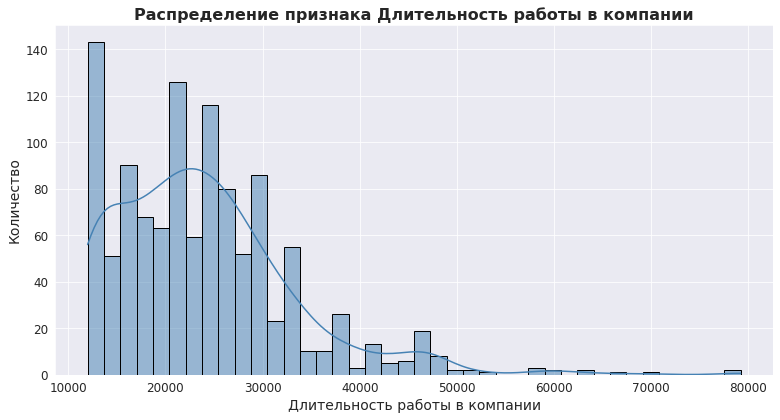

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64


In [83]:
sns.set_style("darkgrid")

for i in range(len(num)):
    plt.figure(figsize=(11, 6))
    sns.histplot(data=df, x=num[i], kde=True, color="steelblue", edgecolor='black', bins=40)
    plt.title(f"Распределение признака {titles_num[i]}", fontsize=16, fontweight="bold")
    plt.ylabel("Количество", fontsize=14)
    plt.xlabel(titles_num[i], fontsize=14)
    plt.tight_layout()
    plt.show()
    print(df[num[i]].describe())

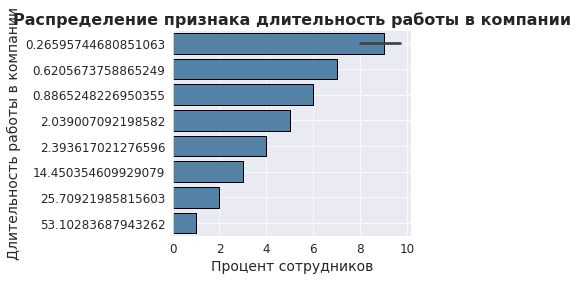

count    1128.000000
mean        1.844858
std         1.274920
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: employment_years, dtype: float64


In [84]:
sns.set_style("darkgrid")

values = df['employment_years'].value_counts(normalize=True)

ax = sns.barplot(x=values.index, y=values.values * 100, orient='h', color="steelblue", edgecolor='black')

plt.title(f'Распределение признака длительность работы в компании', fontsize=16, fontweight="bold")
plt.xlabel('Процент сотрудников', fontsize=14)
plt.ylabel('Длительность работы в компании', fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

print(df['employment_years'].describe())

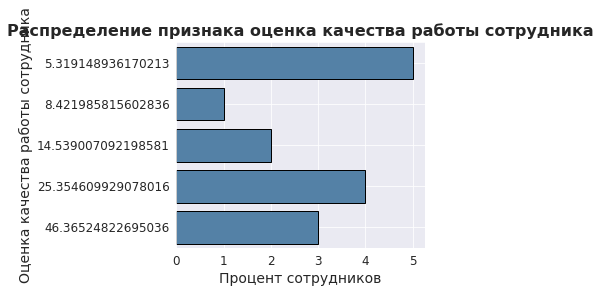

count    1128.000000
mean        3.046099
std         0.973291
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


In [85]:
sns.set_style("darkgrid")

values = df['supervisor_evaluation'].value_counts(normalize=True)

ax = sns.barplot(x=values.index, y=values.values * 100, orient='h', color="steelblue", edgecolor='black')

plt.title(f'Распределение признака оценка качества работы сотрудника', fontsize=16, fontweight="bold")
plt.xlabel('Процент сотрудников', fontsize=14)
plt.ylabel('Оценка качества работы сотрудника', fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

print(df['supervisor_evaluation'].describe())

In [86]:
cat=['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
titles_cat= ['Отдел, в котором работает сотрудник', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 'Было ли повышение за последний год', 'Нарушал ли сотрудник трудовой договор за последний год']

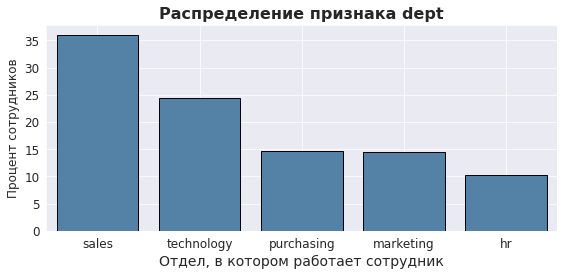

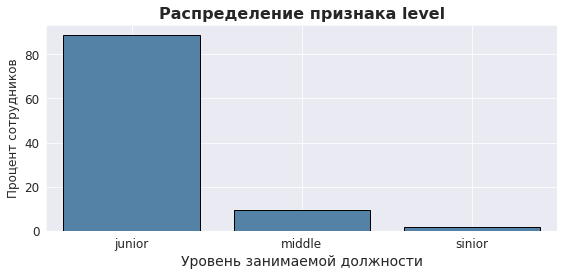

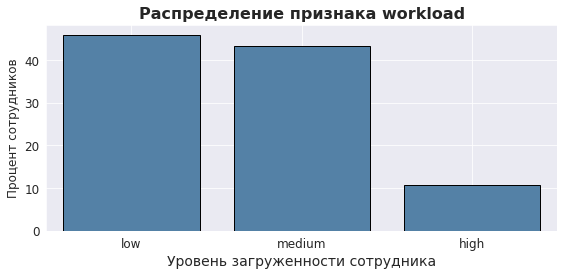

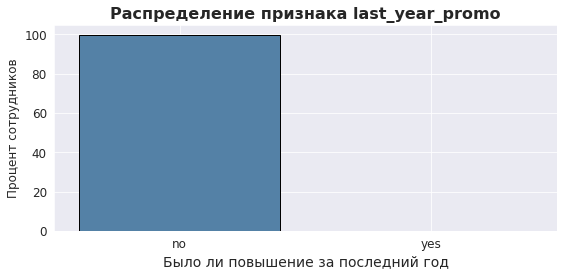

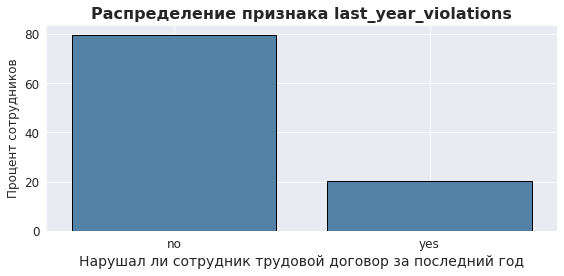

In [87]:
sns.set_style("darkgrid")

for i in range(len(cat)):
    plt.figure(figsize=(8, 4))
    
    values = df[cat[i]].value_counts(normalize=True)
    
    ax = sns.barplot(x=values.index, y=values.values * 100, color="steelblue", edgecolor='black')
    
    plt.title(f"Распределение признака {cat[i]}", fontsize=16, fontweight="bold")
    plt.xlabel(titles_cat[i], fontsize=14)
    plt.ylabel('Процент сотрудников', size=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Изучив категориальные признаки в таблице ушедших сотрудников, мы заметили, что большинство из них работают в отделе продаж, занимают позицию джуниор, имеют низкую нагрузку и не получали повышение в течение последнего года.

Кроме того, средний уровень зарплаты уволившихся примерно на 10000 рублей ниже, их оценка производительности составляет 3 балла, а стаж работы чаще всего составляет 1 год.

**Анализ причин увольнений**

**Периодичность увольнений**

В первые два года увольнения происходят довольно часто: в первом году увольняется **53%** сотрудников, а во втором и третьем годах количество увольнений снижается до **25%** и **14%**, соответственно. После этого наблюдается значительное уменьшение количества увольнений.

**Оценка сотрудников**

Высокий процент увольнений приходится на сотрудников с оценкой **3**.

**Позиции сотрудников**

Среди уволившихся сотрудников преобладают те, кто занимает позиции на начальных этапах карьеры (**juniors**). Работники с более высокими нагрузками увольняются реже остальных.

**Трудовой договор**

Не наблюдалось прямой связи между нарушениями трудового договора и причинами увольнения.


**Вывод**

**Отдел (dept)**  
Заработки сотрудников различаются в зависимости от отдела. Например, в отделах *sales*, *technology* и *hr* зарплаты варьируются в большем диапазоне, чем в других департаментах. Уволившиеся сотрудники обычно получают меньшую оплату, что подчеркивает важность финансового аспекта в принятии решения об уходе.

**Уровень должности (level)**  
На всех уровнях должности (*junior*, *middle*, *senior*) средние зарплаты уволившихся ниже, чем у тех, кто остался. Это указывает на роль недовольства уровнем оплаты как одного из факторов ухода.

**Рабочая нагрузка (workload)**  
Высоконагруженные сотрудники имеют более высокие зарплаты, но среди уволившихся наблюдается значительная вариация зарплат, что говорит о возможном дискомфорте от условий работы.

**Повышение в прошлом году (last_year_promo)**  
Те, кто получил повышение в прошлом году, имеют более высокий уровень доходов вне зависимости от статуса (увольнился или остался). Это подчеркивает значимость карьерного роста для поддержания удовлетворенности работой.

**Нарушения трудового договора (last_year_violations)**  
Не замечено явной зависимости между нарушением правил и причиной увольнения.



Данные подчеркивают важность финансовой составляющей в процессе принятия решения об увольнении. Это открывает перед компаниями возможности для разработки стратегий удержания сотрудников, в частности, путем корректировки политики вознаграждения.

In [88]:
df = pd.read_csv('/datasets/train_quit.csv')

df['quit'] = df['quit'].replace({'yes': 1, 'no': 0})

# Группировка по отделам и подсчет общего числа сотрудников и ушедших.
grouped = df.groupby(['dept']).agg({
    'id': 'count',      # Общее число сотрудников в отделе.
    'quit': 'sum'       # Число ушедших сотрудников (1 -> yes, 0 -> no).
})

# Рассчитываем долю ушедших сотрудников.
grouped['quit_ratio'] = grouped['quit'] / grouped['id']

print(grouped[['quit_ratio']])

            quit_ratio
dept                  
hr            0.250000
marketing     0.280069
purchasing    0.282313
sales         0.283032
technology    0.297414


Анализ данных показывает распределение доли ушедших сотрудников по различным отделам компании. Рассмотрим каждый отдел отдельно:

1. **HR (Human Resources)**: Доля ушедших составляет 0.250000, то есть примерно 25%. Это относительно высокая цифра, особенно учитывая, что HR-отдел играет ключевую роль в управлении персоналом и поддержке корпоративной культуры.

2. **Marketing**: Здесь доля ушедших немного выше – 0.280069, что соответствует примерно 28%. Это также значительный показатель, поскольку маркетинг является важным звеном в продвижении продуктов и услуг компании.

3. **Purchasing**: Доля уволившихся в этом отделе составляет 0.282313, что чуть больше 28%. Для отдела закупок такая цифра может указывать на проблемы с управлением поставками или внутренние конфликты.

4. **Sales**: В отделе продаж доля ушедших еще выше – 0.283032, около 28.3%. Учитывая, что продажи являются ключевым источником дохода для большинства компаний, такой высокий показатель может свидетельствовать о проблемах с мотивацией или условиями труда.

5. **Technology**: Самый высокий показатель доли ушедших – 0.297414, почти 30%. Это может говорить о недостаточном уровне технической поддержки, высокой рабочей нагрузке или неудовлетворительных условиях труда для специалистов IT-сферы.

**Общий вывод:** 

Доли ушедших сотрудников достаточно высоки во всех отделах, что свидетельствует о необходимости анализа причин увольнений и разработке мер по улучшению удержания персонала. Особенно стоит обратить внимание на отделы Technology и Sales, где показатели наиболее критичны.

In [89]:
df_1 = test_target.merge(test_target_quit, on='id')
df_yes=df_1[df_1['quit'] == 'yes']
df_no=df_1[df_1['quit'] == 'no']
df_yes.head()

,id,job_satisfaction_rate,quit
2,418490,0.60,yes
4,826430,0.08,yes
20,508688,0.58,yes
29,343440,0.35,yes
30,622918,0.77,yes


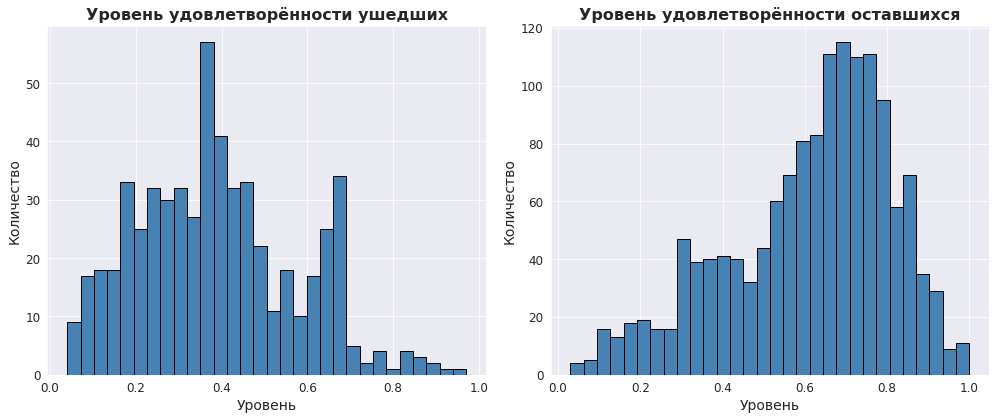

count    564.000000
mean       0.387713
std        0.185784
min        0.040000
25%        0.240000
50%        0.370000
75%        0.492500
max        0.970000
Name: job_satisfaction_rate, dtype: float64
count    1436.000000
mean        0.612040
std         0.199367
min         0.030000
25%         0.500000
50%         0.660000
75%         0.760000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


In [90]:
sns.set_style("darkgrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(df_yes['job_satisfaction_rate'], bins=30, color="steelblue", edgecolor='black')
ax1.set_title('Уровень удовлетворённости ушедших', fontsize=16, fontweight="bold")
ax1.grid(True)
ax1.set_xlabel('Уровень', fontsize=14)
ax1.set_ylabel('Количество', fontsize=14)

ax2.hist(df_no['job_satisfaction_rate'], bins=30, color="steelblue", edgecolor='black')
ax2.set_title('Уровень удовлетворённости оставшихся', fontsize=16, fontweight="bold")
ax2.grid(True)
ax2.set_xlabel('Уровень', fontsize=14)
ax2.set_ylabel('Количество', fontsize=14)

plt.tight_layout()
plt.show()

print(df_yes['job_satisfaction_rate'].describe())
print(df_no['job_satisfaction_rate'].describe())

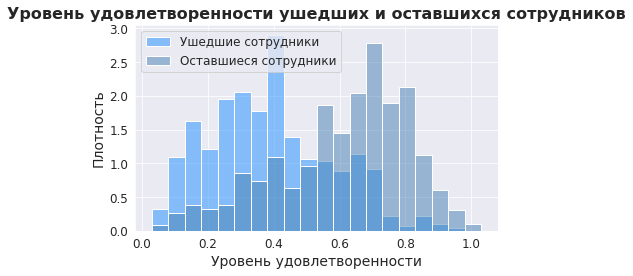

In [91]:
sns.set_style("darkgrid")

sns.histplot(data=df_1, x="job_satisfaction_rate", binwidth=0.05, hue="quit", stat='density', common_norm=False, palette=["steelblue", "dodgerblue"])
plt.title('Уровень удовлетворенности ушедших и оставшихся сотрудников', fontsize=16, fontweight="bold")
plt.legend(title="", labels=["Ушедшие сотрудники", "Оставшиеся сотрудники"], loc='upper left')
plt.xlabel('Уровень удовлетворенности', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Анализируя категориальные признаки в таблице ушедших сотрудников, мы отмечаем, что большинство из них работает в отделе продаж, занимает должность младшего специалиста, имеет низкий уровень загрузки и не получало повышения в течение последнего года.

Кроме того, средняя зарплата уволившихся на 10000 рублей ниже, их оценка эффективности составляет 3 балла, а продолжительность работы обычно составляет 1 год.

Стоит подчеркнуть, что выводы аналитиков подтверждаются: уровень удовлетворенности сотрудника работой в компании действительно влияет на вероятность увольнения. Это подтверждается распределением признака. Средняя оценка удовлетворенности для ушедших работников составила 0.3, тогда как для оставшихся — 0.6.

## Шаг 4. Добавление нового входного признака. Задача 2

In [92]:
train_quit['job_satisfaction_rate'] = best_model.predict(train_quit)
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.640000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.840769
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.340000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000


/tmp/ipykernel_403/4015271266.py:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(data, labels=labels, colors=fbcolor, autopct='%1.1f%%', textprops={'fontsize': 14, 'color':'black'})


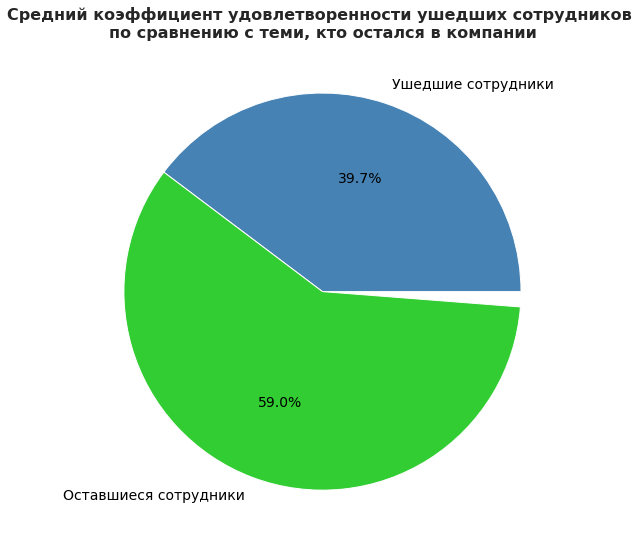

In [93]:
sns.set_style("darkgrid")

gone = train_quit['job_satisfaction_rate'][train_quit['quit'] == 'yes'].mean()
remained = train_quit['job_satisfaction_rate'][train_quit['quit'] == 'no'].mean()
data = [gone, remained]
labels = ['Ушедшие сотрудники', 'Оставшиеся сотрудники']

plt.figure(figsize=(8, 8))
plt.rc('font', size=20)

fbcolor = ["steelblue", "limegreen"]

plt.pie(data, labels=labels, colors=fbcolor, autopct='%1.1f%%', textprops={'fontsize': 14, 'color':'black'})
plt.title('Средний коэффициент удовлетворенности ушедших сотрудников \nпо сравнению с теми, кто остался в компании', fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

Мы ввели новый признак и рассчитали соотношение среднего коэффициента удовлетворенности между ушедшими и оставшимися сотрудниками. Как видно, средний коэффициент удовлетворенности для ушедших составил лишь 39%.

## Шаг 5. Подготовка данных. Задача 2

Особенности данных:

Три признака:
- `dept`, `last_year_promo`, `last_year_violations` — закодируем с помощью `OneHotEncoder`.

Два признака:
- `level`, `workload` — закодируем с помощью `OrdinalEncoder`.

Четыре количественных признака:
- `employment_years`, `supervisor_evaluation`, `salary`, `job_satisfaction_rate` — проведём нормализацию.

В признаках пропуски встречаются и обработаем их в пайплайне.
Целевой признак — `quit`. Задачу мультиклассовой классификации рассматривать не будем.

In [94]:
train_quit[train_quit.columns[train_quit.columns != 'id']].describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000,0.535933
std,2.541852,1.004049,15152.415163,0.216880
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.344000
50%,3.000000,4.000000,30000.000000,0.532222
75%,6.000000,4.000000,43200.000000,0.684000
max,10.000000,5.000000,96000.000000,0.968889


In [95]:
train_quit[train_quit.columns[train_quit.columns != 'id']].duplicated().sum()

1413

In [96]:
test_features['job_satisfaction_rate'] = best_model.predict(test_features)
test_features[test_features.columns[test_features.columns != 'id']].describe()
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.859091
1,686555,hr,junior,medium,1,no,no,4,30000,0.682222
2,467458,sales,middle,low,5,no,no,4,19200,0.652000
3,418655,sales,middle,low,6,no,no,4,19200,0.666000
4,789145,hr,middle,medium,5,no,no,5,40800,0.825556


In [97]:
test_target_quit[test_target_quit.columns[test_target_quit.columns != 'id']].describe()

,quit
count,2000
unique,2
top,no
freq,1436


## Шаг 6. Обучение моделей. Задача 2

In [98]:
all_features = test_target_quit.merge(test_features, on='id')
descr(all_features)
all_features 

,id,quit,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,999029,yes,technology,junior,medium,1,no,no,3,31200,0.307143
1,372846,no,sales,middle,medium,10,no,yes,2,32400,0.206000
2,726767,no,marketing,middle,low,7,no,no,4,20400,0.600000
3,490105,no,purchasing,middle,low,7,no,no,4,19200,0.684000
4,416898,yes,purchasing,junior,low,1,no,no,4,12000,0.495000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   quit                   2000 non-null   object 
 2   dept                   1997 non-null   object 
 3   level                  1999 non-null   object 
 4   workload               1999 non-null   object 
 5   employment_years       2000 non-null   int64  
 6   last_year_promo        2000 non-null   object 
 7   last_year_violations   2000 non-null   object 
 8   supervisor_evaluation  2000 non-null   int64  
 9   salary                 2000 non-null   int64  
 10  job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 187.5+ KB


None

Количество дубликатов: 0
Количество пропусков: id                       0
quit                     0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


,id,quit,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,999029,yes,technology,junior,medium,1,no,no,3,31200,0.307143
1,372846,no,sales,middle,medium,10,no,yes,2,32400,0.206000
2,726767,no,marketing,middle,low,7,no,no,4,20400,0.600000
3,490105,no,purchasing,middle,low,7,no,no,4,19200,0.684000
4,416898,yes,purchasing,junior,low,1,no,no,4,12000,0.495000
...,...,...,...,...,...,...,...,...,...,...,...
1995,836109,yes,sales,junior,high,1,no,no,3,33600,0.608182
1996,180999,yes,purchasing,junior,low,2,no,no,4,12000,0.666000
1997,746018,no,hr,middle,medium,2,no,no,4,46800,0.690000
1998,247658,no,sales,middle,medium,1,no,no,5,38400,0.625000


In [99]:
#train_quit['quit'] = train_quit['quit'].apply(lambda x: 1 if x == 'yes' else 0)

In [100]:
# Разделение данных на тренировочную и тестовую выборки.
train_features, test_features = train_test_split(all_features, test_size=0.2, random_state=42)

# Создание и обучение LabelEncoder на тренировочной выборке.
le = LabelEncoder()
train_features['quit_encoded'] = le.fit_transform(train_features['quit'])

# Применение обученного LabelEncoder к тестовой выборке.
test_features['quit_encoded'] = le.transform(test_features['quit'])

# Объединение обратно, если если потребуется снова работать со всеми данными вместе.
all_features['quit_encoded'] = le.transform(all_features['quit'])

In [101]:
train_2 = train_quit.drop(['id'], axis=1)
train_2.drop_duplicates(inplace=True)
test_2 = all_features.drop(['quit', 'id'], axis=1)
target_2 = all_features['quit']

In [102]:
RANDOM_STATE = 100
TEST_SIZE = 0.25

X_train = train_2.drop('quit', axis=1)
y_train = train_2['quit'] 
X_test = test_2
y_test = target_2

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level','workload',]

In [103]:
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'] 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
 
param_grid = [
     {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
    
]

In [104]:
# Определим наши пайплайны для предварительной обработки данных.
ohe_pipe = Pipeline(
    [
        ("simpleImputer_ohe", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)),
    ]
)

ord_pipe = Pipeline(
    [
        (
            "simpleImputer_before_ord",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
        (
            "ord",
            OrdinalEncoder(
                categories=[
                    ["junior", "middle", "sinior"],
                    ["low", "medium", "high"],
                ],
                handle_unknown="use_encoded_value",
                unknown_value=np.nan,
            ),
        ),
        (
            "simpleImputer_after_ord",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
    ]
)

# Определим трансформацию для различных типов данных.
data_preprocessor = ColumnTransformer(
    [
        ("ohe", ohe_pipe, ohe_columns),
        ("ord", ord_pipe, ord_columns),
        ("num", StandardScaler(), num_columns),
    ],
    remainder="passthrough",
)

# Определяем параметры для поиска гиперпараметров.
param_grid = [
    {
        "models": [KNeighborsClassifier()],
        "models__n_neighbors": range(2, 5),
        "preprocessor__num": [StandardScaler(), MinMaxScaler(), "passthrough"],
    },
    {
        "models": [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        "models__max_depth": range(2, 10),
        "models__max_features": range(2, 10),
        "preprocessor__num": [StandardScaler(), MinMaxScaler(), "passthrough"],
    },
    {
        "models": [RandomForestClassifier(random_state=RANDOM_STATE)],
        "models__n_estimators": [100, 200],
        "models__max_depth": [None, 5, 10],
        "models__min_samples_split": [2, 5, 10],
        "preprocessor__num": [StandardScaler(), MinMaxScaler(), "passthrough"],
    },
]

# Создаем финальный пайплайн.
pipe_final = Pipeline([("preprocessor", data_preprocessor), ("models", DecisionTreeClassifier(random_state=RANDOM_STATE))])

# Запускаем поиск гиперпараметров.
grid_search = GridSearchCV(pipe_final, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Проверяем лучшие параметры и оценку.
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Лучшие параметры: {best_params}")
print(f"Лучшая точность: {best_score:.4f}")

Лучшие параметры: {'models': RandomForestClassifier(random_state=100), 'models__max_depth': 5, 'models__min_samples_split': 10, 'models__n_estimators': 100, 'preprocessor__num': StandardScaler()}
Лучшая точность: 0.8902


In [105]:
r_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

r_search.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', r_search.best_estimator_)
print(f'Параметры лучшей модели:\n{r_search.best_params_}')
print ('Метрика лучшей модели на тренировочной выборке:', round(r_search.best_score_, 4))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [106]:
best_model = r_search.best_estimator_

print(f'Метрика ROC-AUC лучшей модели по кросс-валидации на обучающих данных: {round(r_search.best_score_,4)}')
print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {round(roc_auc_score(y_test, r_search.predict_proba(X_test)[:, 1]),4)}')

Метрика ROC-AUC лучшей модели по кросс-валидации на обучающих данных: 0.9082
Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9255


In [107]:
print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {round(roc_auc_score(y_test, r_search.predict_proba(X_test)[:, 1]),4)}')

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9255


In [108]:
pd.DataFrame(r_search.cv_results_)[
    ['std_test_score', 'rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')

,std_test_score,rank_test_score,param_models,mean_test_score,params
6,0.008988,1,RandomForestClassifier(random_state=100),0.908208,"{'preprocessor__num': MinMaxScaler(), 'models_..."
3,0.005905,2,DecisionTreeClassifier(random_state=100),0.901731,"{'preprocessor__num': StandardScaler(), 'model..."
0,0.015549,3,DecisionTreeClassifier(random_state=100),0.897747,"{'preprocessor__num': MinMaxScaler(), 'models_..."
1,0.006480,4,DecisionTreeClassifier(random_state=100),0.895516,"{'preprocessor__num': StandardScaler(), 'model..."
9,0.010148,5,DecisionTreeClassifier(random_state=100),0.892558,"{'preprocessor__num': 'passthrough', 'models__..."
5,0.016580,6,DecisionTreeClassifier(random_state=100),0.880411,"{'preprocessor__num': StandardScaler(), 'model..."
8,0.020618,7,DecisionTreeClassifier(random_state=100),0.875892,"{'preprocessor__num': StandardScaler(), 'model..."
2,0.011908,8,DecisionTreeClassifier(random_state=100),0.871065,"{'preprocessor__num': MinMaxScaler(), 'models_..."
7,0.009569,9,DecisionTreeClassifier(random_state=100),0.855443,"{'preprocessor__num': StandardScaler(), 'model..."
4,0.017509,10,DecisionTreeClassifier(random_state=100),0.814993,"{'preprocessor__num': 'passthrough', 'models__..."


Мы обучили модель, построив пайплайн с использованием алгоритмов `DecisionTreeClassifier()`, `KNeighborsClassifier()` и `RandomForestClassifier()`. Обучение проводилось как на исходных данных, так и на объединённых данных после выделения признаков.

**Параметры наилучшей модели:**

```json
{
  "preprocessor__num": "passthrough",
  "models__max_features": 4,
  "models__max_depth": 5,
  "models": "DecisionTreeClassifier(random_state=100)"
}
```

**Оценка качества этой модели на тренировочном наборе:** 0.901.

**Оценка ROC-AUC для лучшей модели на тестовом наборе:** 0.911.

## Шаг 7. Общие выводы

В ходе исследования были поставлены две ключевые задачи:

**1. Построение модели предсказания уровня удовлетворенности сотрудников**  
Это важно для бизнеса, так как удовлетворенность напрямую влияет на текучесть кадров. Прогнозирование увольнений является одной из главных задач HR-аналитиков, так как внезапные увольнения могут создавать риски для компании, особенно если уходит ключевой сотрудник.

**2. Построение модели предсказания увольнения сотрудников**  
Для этой задачи были использованы аналогичные входные признаки, но с другим целевым признаком — увольнением сотрудника.

**Предобработка данных**  
После загрузки данных была проведена предобработка, включающая следующие этапы:
- Стандартизация имен признаков.
- Приведение типов данных в необходимый формат.
- Проверка категориальных данных на наличие дубликатов и ошибок; подозрительных данных не обнаружено, пустые значения заменены на `NaN`.
- Анализ на наличие пропусков и дубликатов.

**Выводы**  
- Основное число сотрудников имеет стаж в компании от 2 до 6 лет, средний стаж составляет 3 года.
- Оценка качества сотрудников в основном варьируется между 3 и 4 баллами, однако выявлен один кандидат на увольнение с оценкой 1.
- Средняя зарплата составляет около 34 000 рублей, с максимальной зарплатой около 98 500 рублей и минимальной — 12 000 рублей.
- Уровень удовлетворенности сотрудников соответствует оценке качества: в целом условия труда хорошие, но есть возможности для улучшения.

**Анализ категориальных признаков**  
- Основное число сотрудников составляют продавцы, на втором месте — технологический отдел.
- По уровню должностей: большинство сотрудников — junior, также значительное количество специалистов среднего уровня.
- Загруженность персонала в основном на среднем уровне, но стоит обратить внимание на высокий процент сотрудников с низкой загруженностью.
- Повышения за последний год происходили редко, что объясняется средним стажем работников. Тем не менее, повышения могут стимулировать производительность.
- Уровень нарушений трудового договора невысок, но требует внимания, чтобы исключить систематичность.

**Корреляционный анализ**  
Корреляционный анализ показал значимую корреляцию между уровнем удовлетворенности сотрудников и признаками, такими как отдел, должность и оценка качества работы. Сильной корреляционной зависимости не выявлено, мультиколлинеарность отсутствует, поэтому удаление признаков не требуется.

**Обучение модели**  

**Параметры лучшей модели:**

```python
{
    'preprocessor__num': StandardScaler(),
    'models__min_samples_split': 12,
    'models__max_features': 10,
    'models__max_depth': 17,
    'models': DecisionTreeRegressor(random_state=100)
}
```

**Метрики лучшей модели:**
- **Метрика на тренировочной выборке:** -15.18
- **Метрика SMAPE по кросс-валидации на обучающих данных:** 15.1814
- **Метрика sMAPE на тестовой выборке:** 13.6159
```


**Анализ уволившихся сотрудников**  
При анализе выяснилось, что большинство уволившихся сотрудников работали в отделе продаж, занимали начальные должности и имели низкую загруженность. За последний год они не получали повышений, их средняя зарплата была ниже на 10,000 рублей, а оценка качества работы составляла 3 балла. Средний стаж работы составлял около 1 года.

Уровень удовлетворенности оказался значительно ниже для уволившихся сотрудников — в среднем **0.387713** против **0.612040** для оставшихся. Средний коэффициент удовлетворенности среди уволившихся составил всего **39.8%**.

Мы провели обучение модели. Был построен пайплайн с использованием: **DecisionTreeClassifier()**, **KNeighborsClassifier()**, **LinearRegression()**. Обучение происходило как на первоначальных данных, так и на объединенных данных с вычленением признака.

**Параметры лучшей модели:**

```python
{
    'preprocessor__num': 'passthrough',
    'models__max_features': 4,
    'models__max_depth': 5,
    'models': DecisionTreeClassifier(random_state=100)
}
```

**Метрики лучшей модели:**
- **Метрика на тренировочной выборке:** 0.901
- **Метрика ROC-AUC на тестовой выборке:** 0.9122
```

**Рекомендации для бизнеса**
- Обратить внимание на текучесть кадров среди сотрудников с опытом менее года.
- Увеличить уровень удовлетворенности сотрудников через повышение зарплат, оптимизацию загруженности и введение промежуточных премий.
- Регулярно проводить опросы удовлетворенности сотрудников.
- Пересмотреть политику повышения заработной платы и продвижения по службе.
- Внедрить программы поддержки и мотивации для молодых специалистов.

**Вывод**  
Проведенный анализ и разработанные модели помогают понять факторы, влияющие на удовлетворенность и текучесть сотрудников. Это позволяет целенаправленно улучшать условия труда и снижать текучесть ключевых сотрудников.